In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train.csv')
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df.shape

(1460, 81)

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [4]:
pd.options.display.max_rows = 150
round(100*df.isnull().mean(),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [5]:
# Drop 'Id','Alley','PoolQC','Fence','MiscFeature' as majority of data is null
df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [6]:
#Calculating mode and median for columns having smaller %age of null values
MasVnrArea_median = df['MasVnrArea'].median()
LotFrontage_median = df['LotFrontage'].median()
BsmtQual_mode = df['BsmtQual'].mode().iloc[0]
BsmtCond_mode = df['BsmtCond'].mode().iloc[0]
BsmtExposure_mode = df['BsmtExposure'].mode().iloc[0]
BsmtFinType1_mode = df['BsmtFinType1'].mode().iloc[0]
BsmtFinType2_mode = df['BsmtFinType2'].mode().iloc[0]
Electrical_mode = df['Electrical'].mode().iloc[0]
FireplaceQu_mode = df['FireplaceQu'].mode().iloc[0]
GarageType_mode = df['GarageType'].mode().iloc[0]
GarageYrBlt_median = df['GarageYrBlt'].median()
GarageFinish_mode = df['GarageFinish'].mode().iloc[0]
GarageQual_mode = df['GarageQual'].mode().iloc[0]
GarageCond_mode = df['GarageCond'].mode().iloc[0]

In [7]:
#Imputating null values
df['MasVnrArea'] = df['MasVnrArea'].fillna(MasVnrArea_median) #Imputing with median value
df['MasVnrType'] = df['MasVnrType'].fillna('None') #Assuming Masonry veneer type as None
df['LotFrontage'] = df['LotFrontage'].fillna(LotFrontage_median) #Imputing with median value
df['BsmtQual'] = df['BsmtQual'].fillna(BsmtQual_mode) #Imputing with NA
df['BsmtCond'] = df['BsmtCond'].fillna(BsmtCond_mode) #Imputing with NA
df['BsmtExposure'] = df['BsmtExposure'].fillna(BsmtExposure_mode) #Imputing with NA
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(BsmtFinType1_mode) #Imputing with NA
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(BsmtFinType2_mode) #Imputing with NA
df['Electrical'] = df['Electrical'].fillna(Electrical_mode) #Imputing with mode value
df['FireplaceQu'] = df['FireplaceQu'].fillna(FireplaceQu_mode) #Imputing with mode value
df['GarageType'] = df['GarageType'].fillna(GarageType_mode) #Imputing with mode value
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(GarageYrBlt_median) #Imputing with median value
df['GarageFinish'] = df['GarageFinish'].fillna(GarageFinish_mode) #Imputing with mode value
df['GarageQual'] = df['GarageQual'].fillna(GarageQual_mode) #Imputing with mode value
df['GarageCond'] = df['GarageCond'].fillna(GarageCond_mode) #Imputing with mode value

In [8]:
#Checking null %age again
pd.options.display.max_rows = 150
round(100*df.isnull().mean(),2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

In [9]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

In [10]:
#Ordinal encoding
di1 = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}
df['ExterQual'].replace(di1, inplace=True)
df['ExterCond'].replace(di1, inplace=True)
df['HeatingQC'].replace(di1, inplace=True)
df['KitchenQual'].replace(di1, inplace=True)

In [11]:
#Ordinal encoding
di2 = {"Ex":6, "Gd":5, "TA":4, "Fa":3, "Po":2, "NA":1}
df['BsmtQual'].replace(di2, inplace=True)
df['BsmtCond'].replace(di2, inplace=True)
df['FireplaceQu'].replace(di2, inplace=True)
df['GarageQual'].replace(di2, inplace=True)
df['GarageCond'].replace(di2, inplace=True)

In [12]:
#Ordinal encoding
di3 = {"Gd":5, "Av":4, "Mn":3, "No":2, "NA":1}
df['BsmtExposure'].replace(di3, inplace=True)

di4 = {"Y":1, "N":0}
df['CentralAir'].replace(di4, inplace=True)

In [13]:
pd.options.display.max_columns = 100
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0          4   
1  CompShg     MetalSd     MetalSd       None         0.0          3   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0          4   
3  CompShg     Wd Sdng     Wd Shng       None         0.0          3   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0          4   

   ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure BsmtFinType1  \
0          3      PConc         5         4             2          GLQ   
1          3     CBlock         5         4             5          ALQ   
2          3      PConc         5         4             3          GLQ   
3          3     BrkTil         4         5             2          ALQ   
4          3      PConc         5         4             4          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

   HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          5           1      SBrkr       856       854             0   
1          5           1      SBrkr      1262         0             0   
2          5           1      SBrkr       920       866             0   
3          4           1      SBrkr       961       756             0   
4          5           1      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1            4             8        Typ           0   
1             1            3             6        Typ           1   
2             1            4             6        Typ           1   
3             1            4             7        Typ           1   
4             1            4    

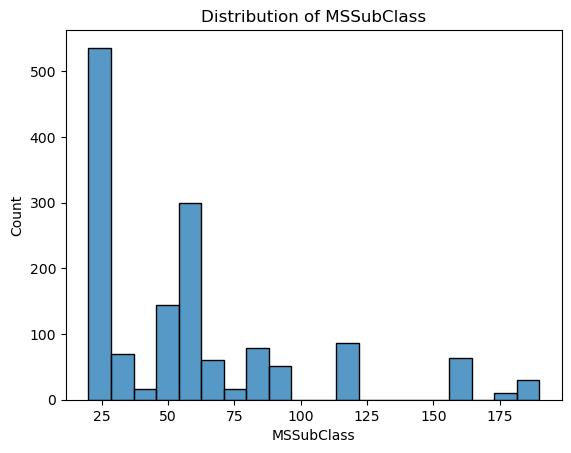

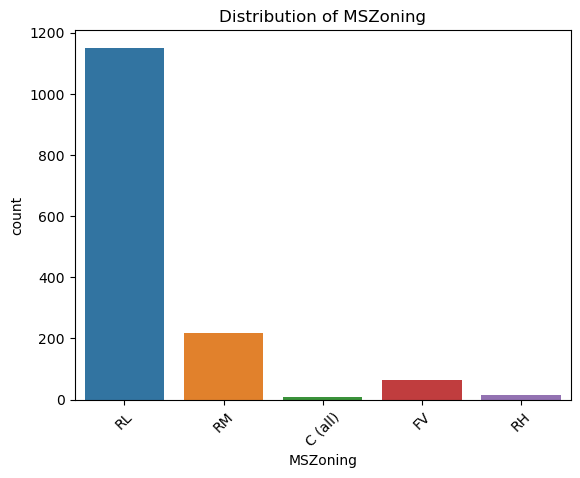

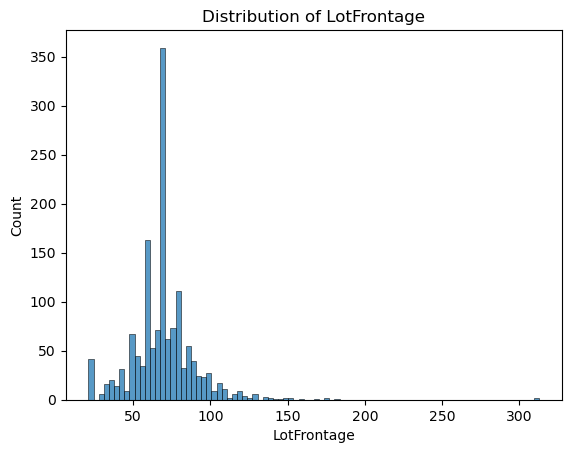

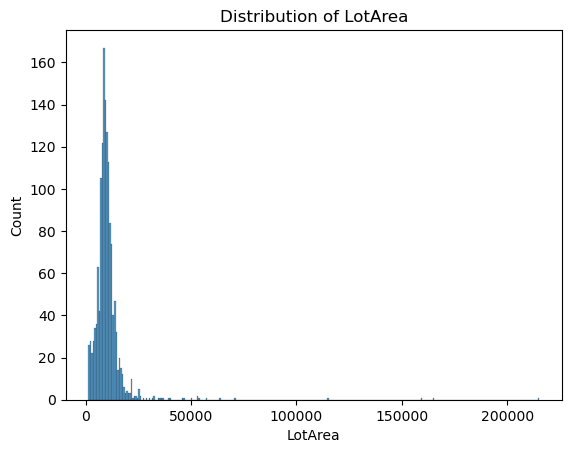

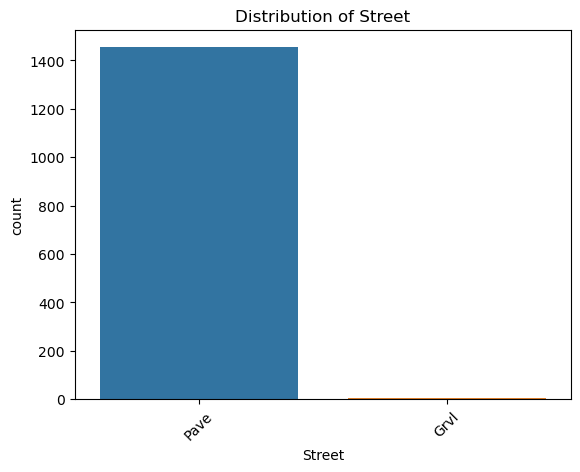

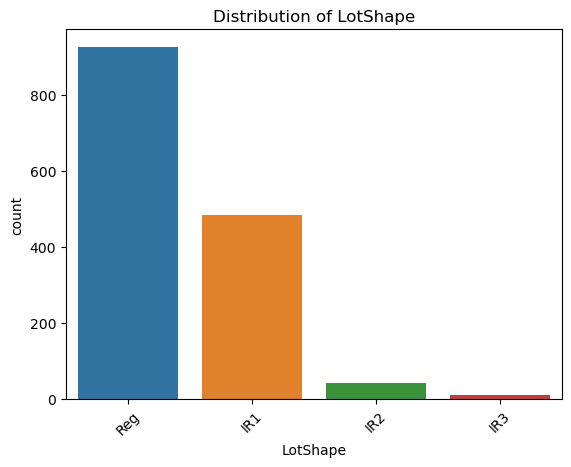

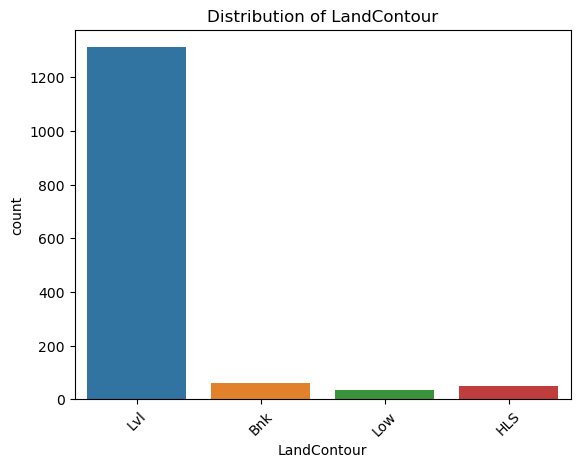

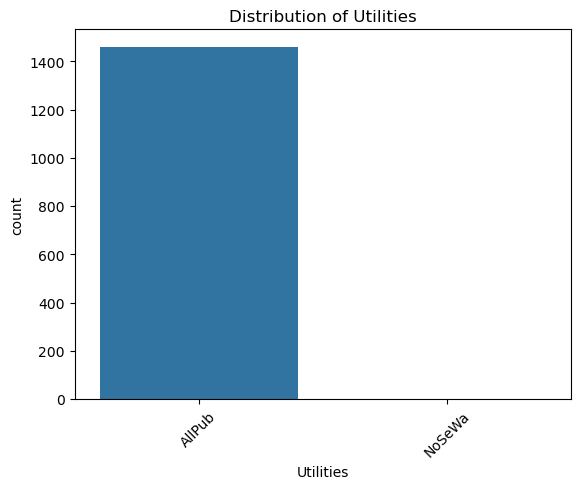

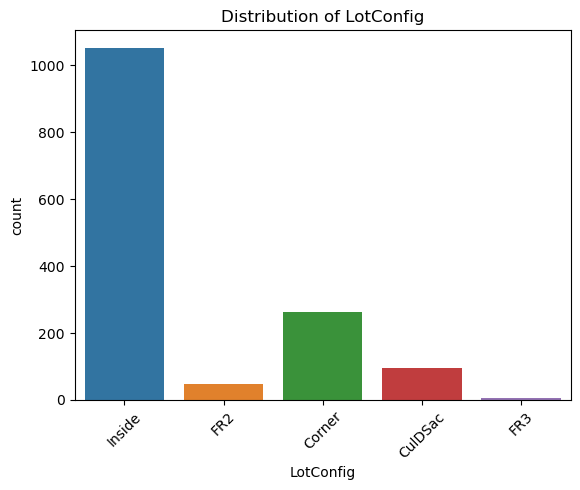

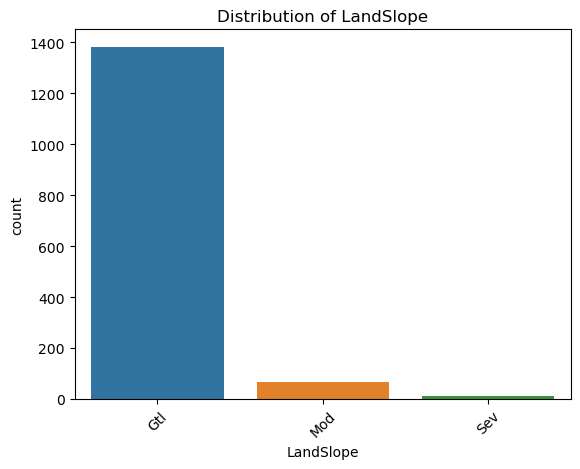

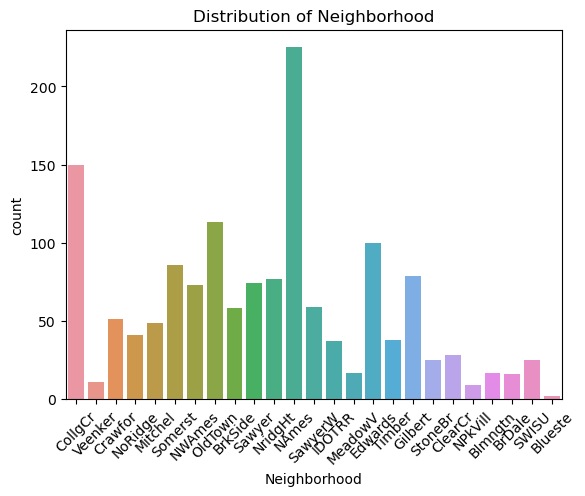

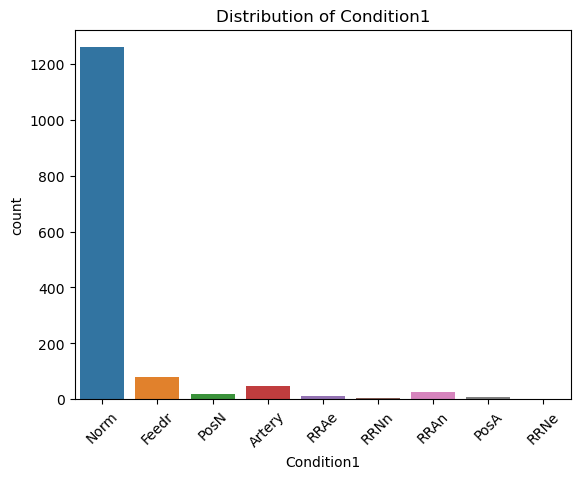

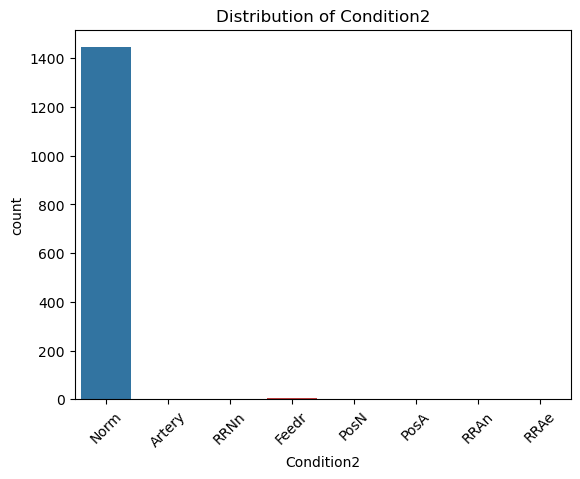

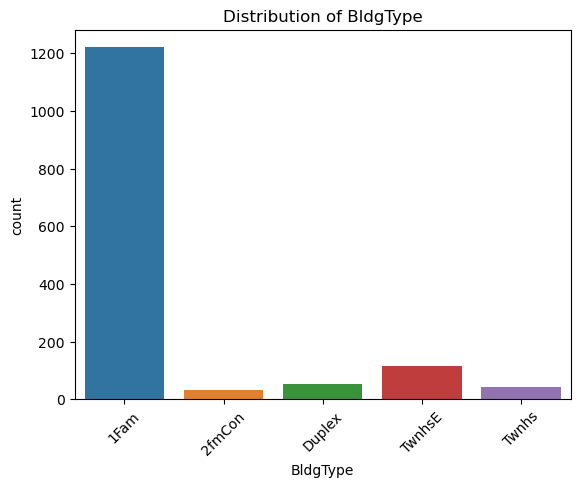

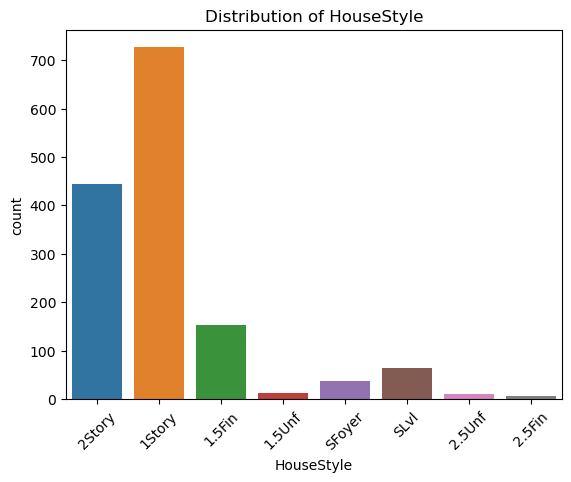

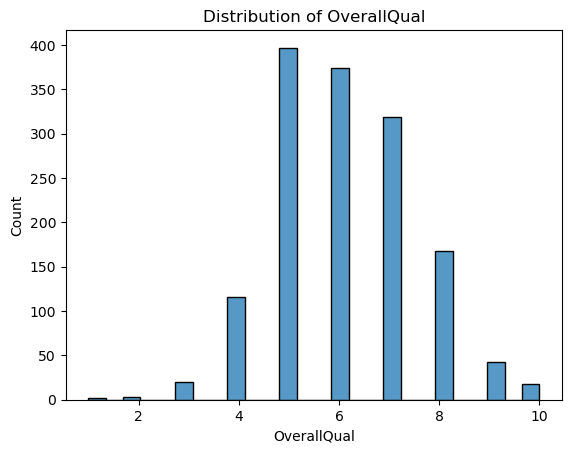

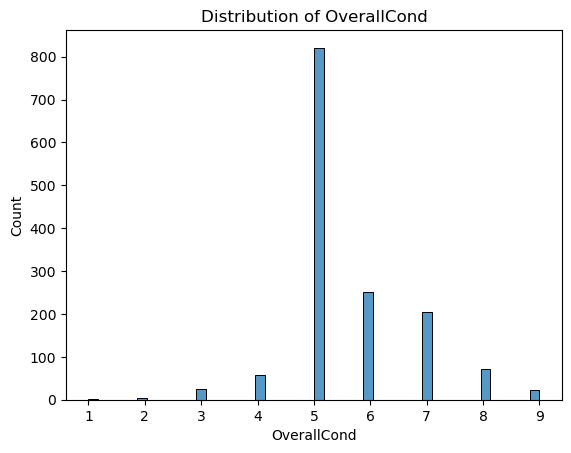

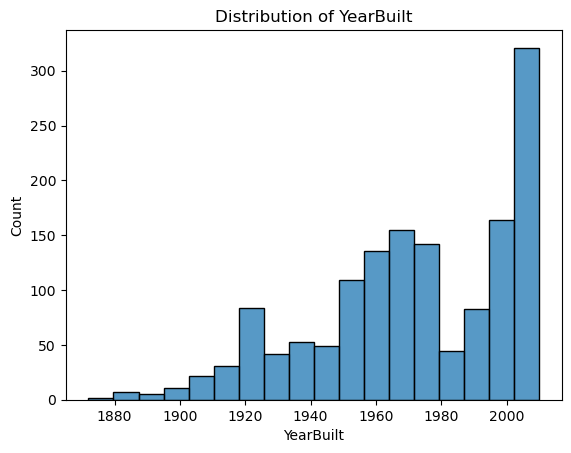

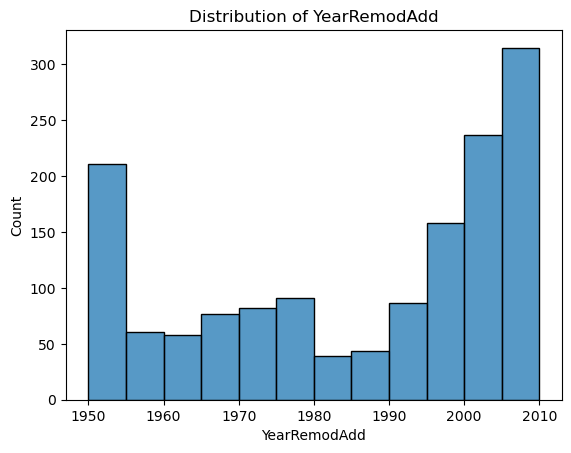

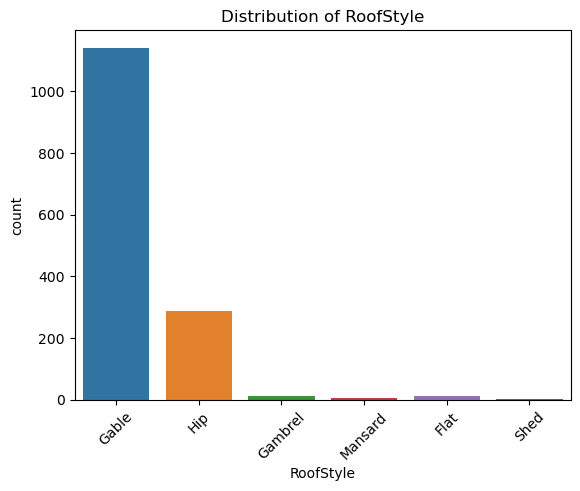

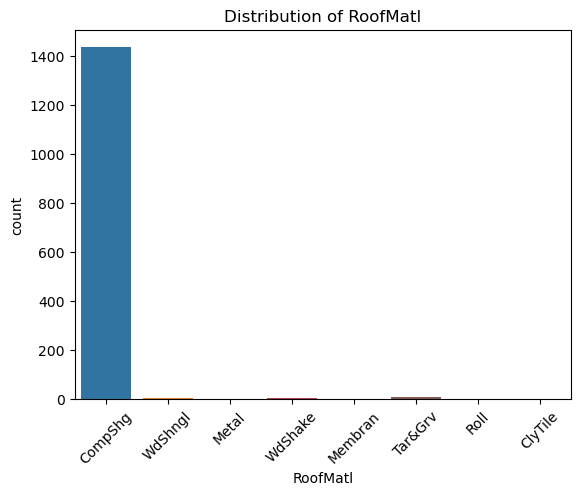

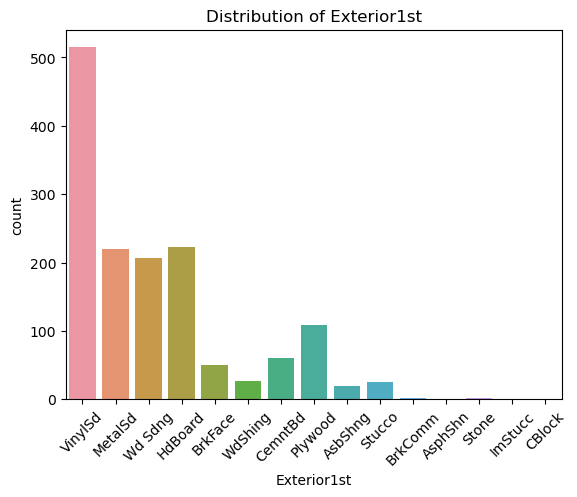

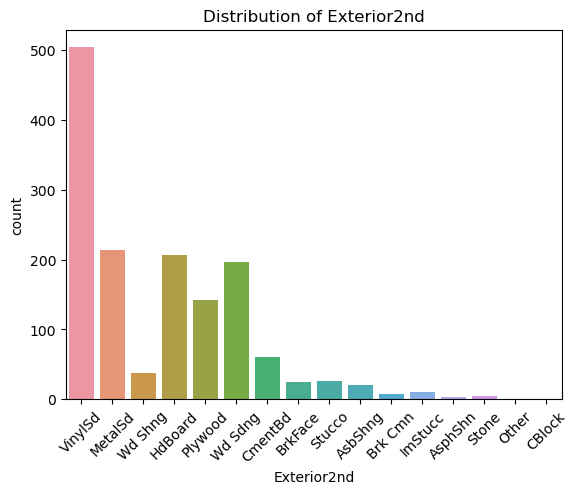

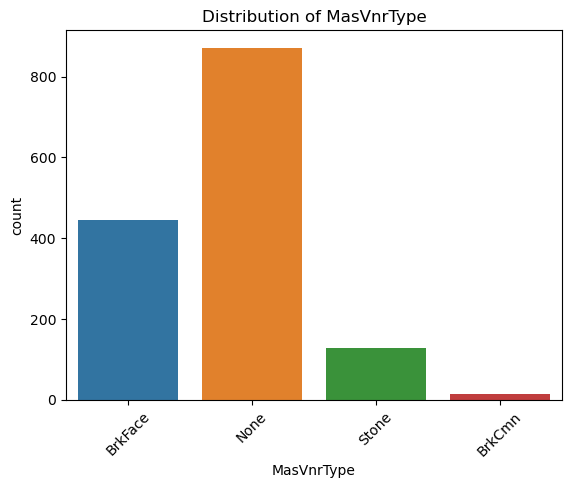

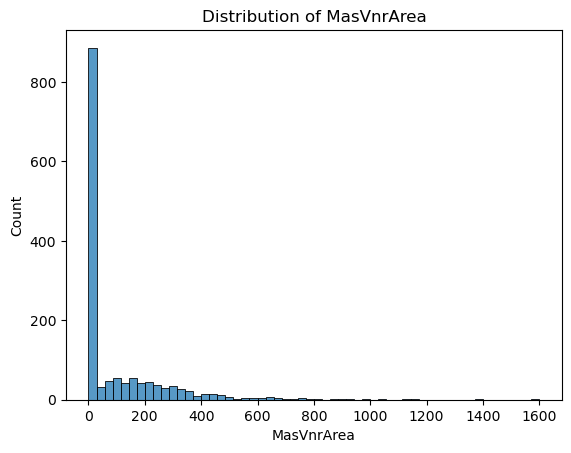

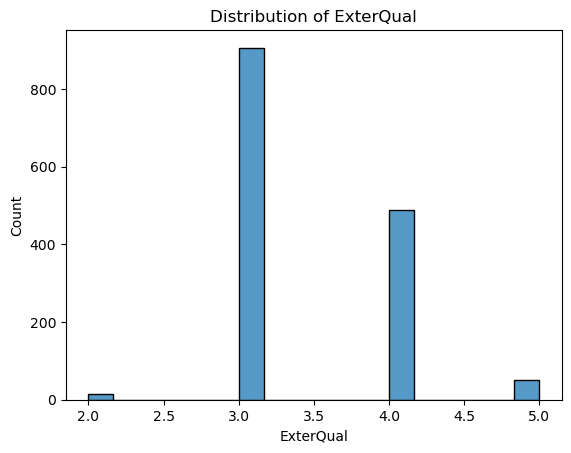

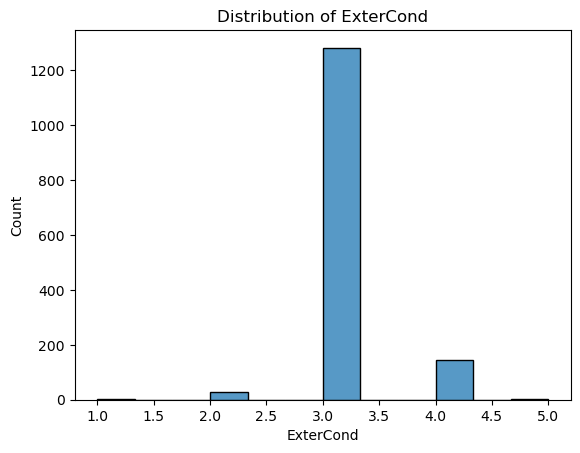

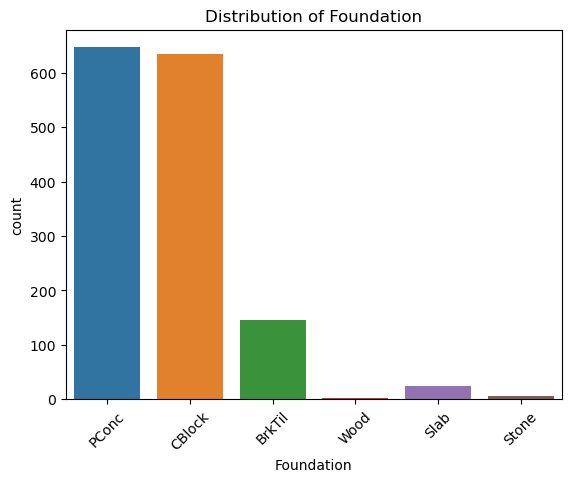

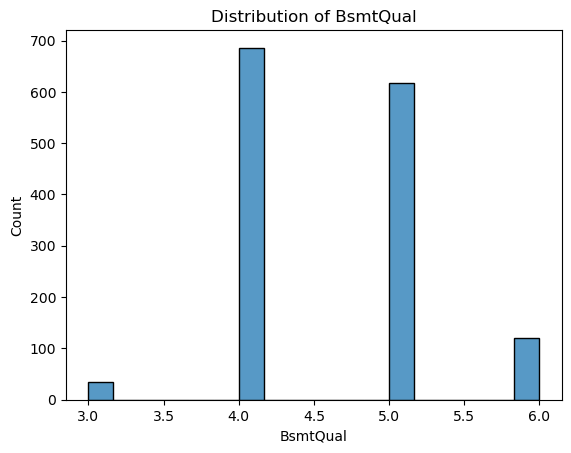

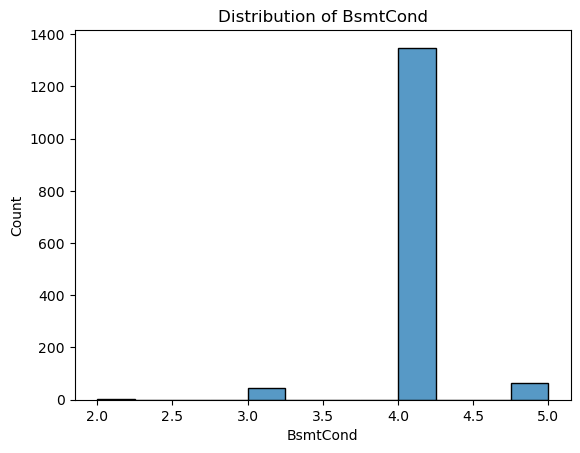

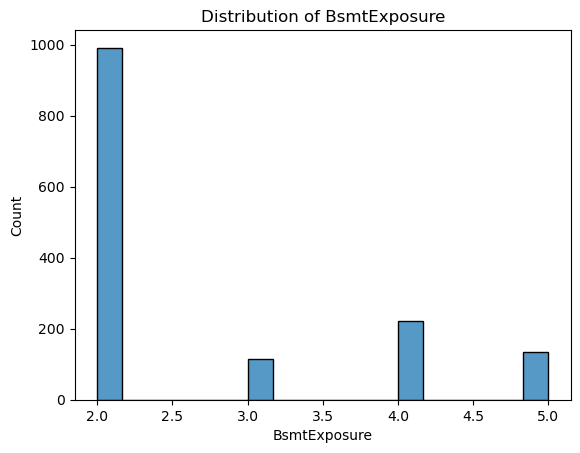

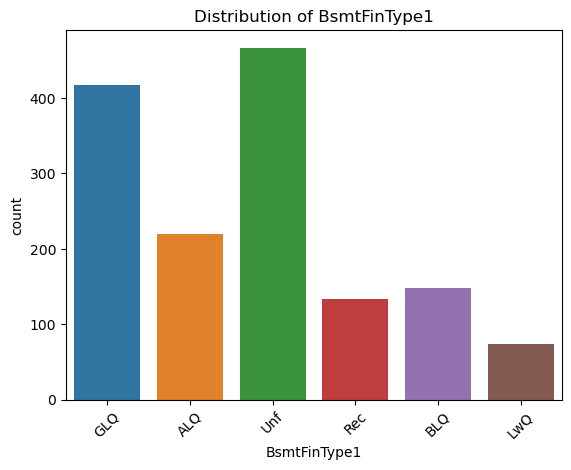

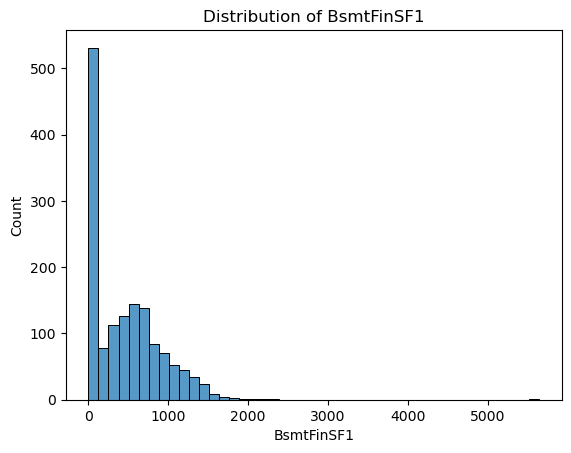

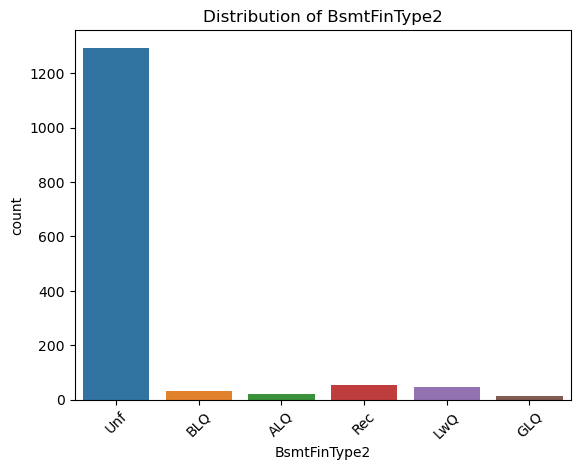

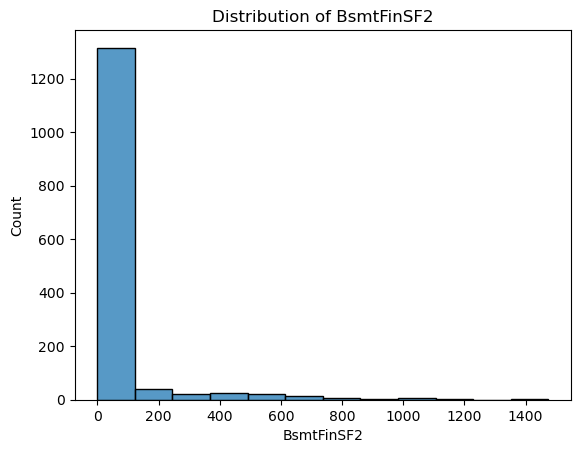

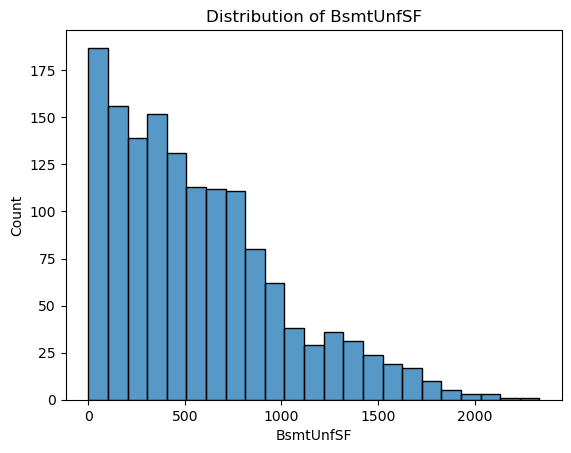

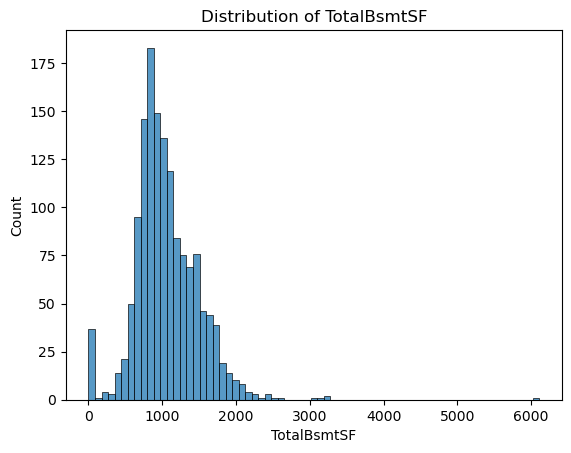

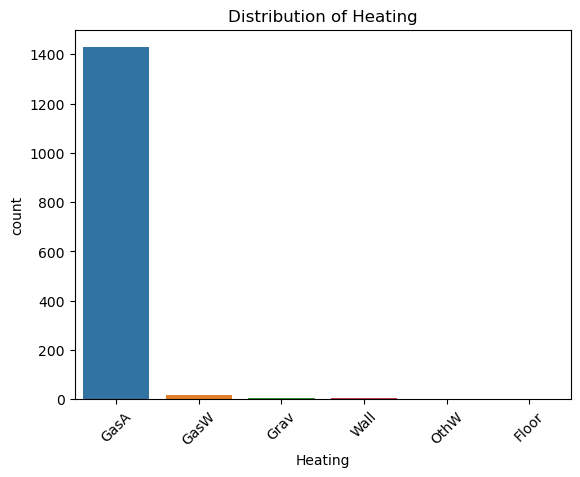

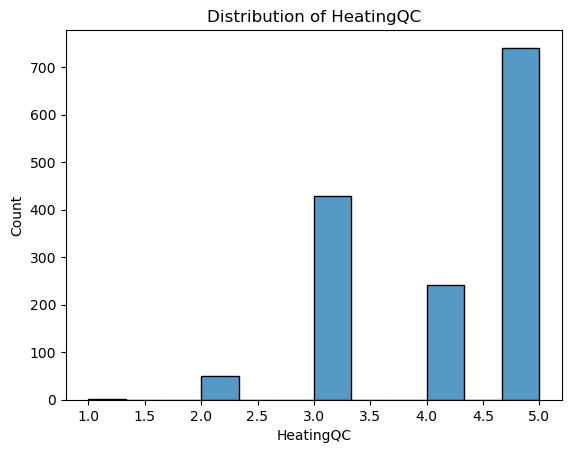

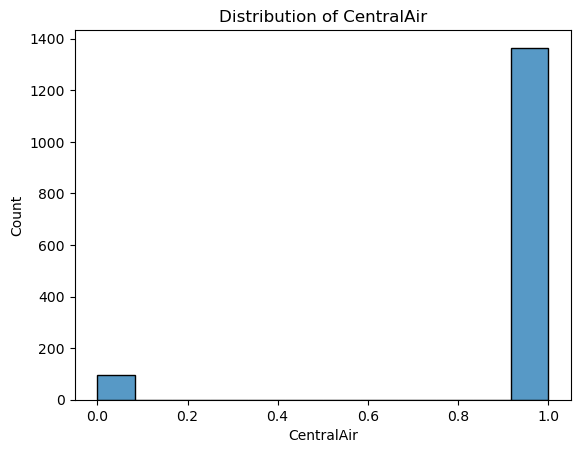

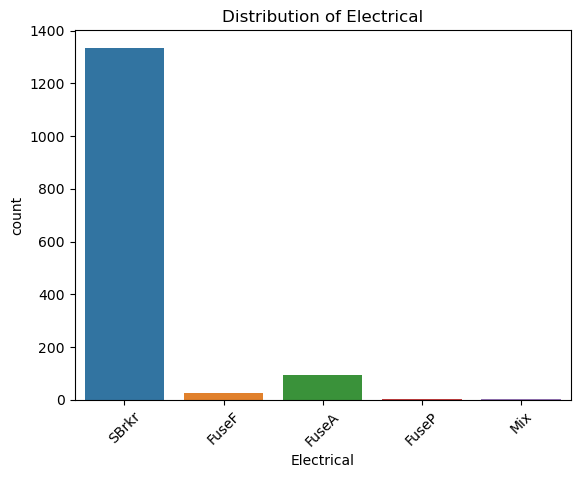

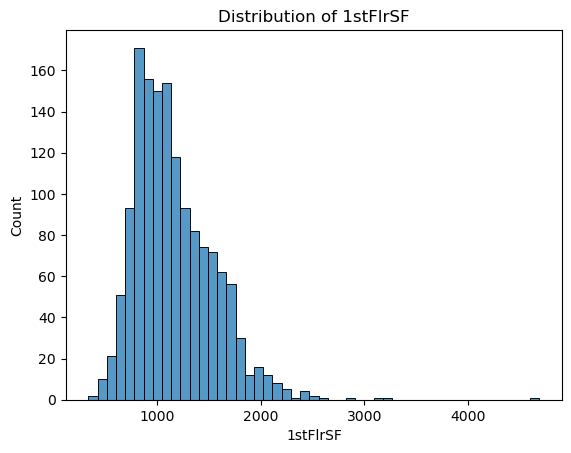

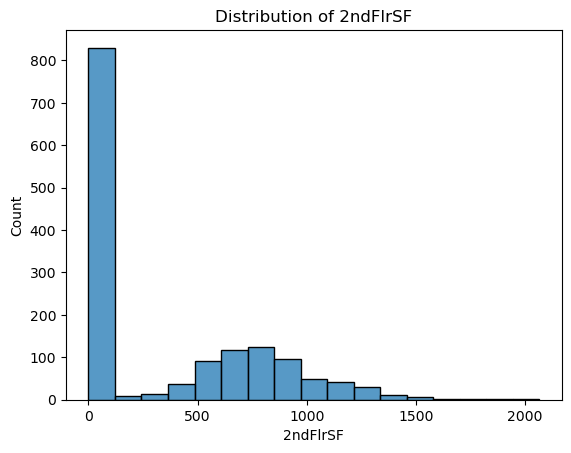

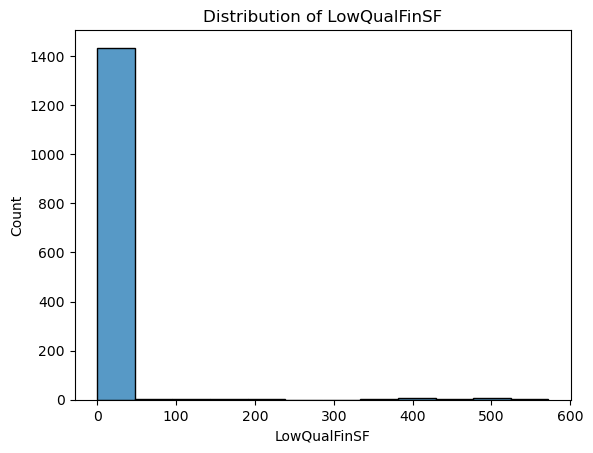

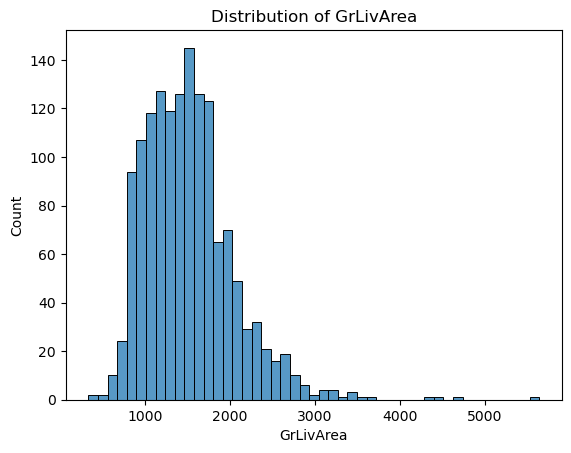

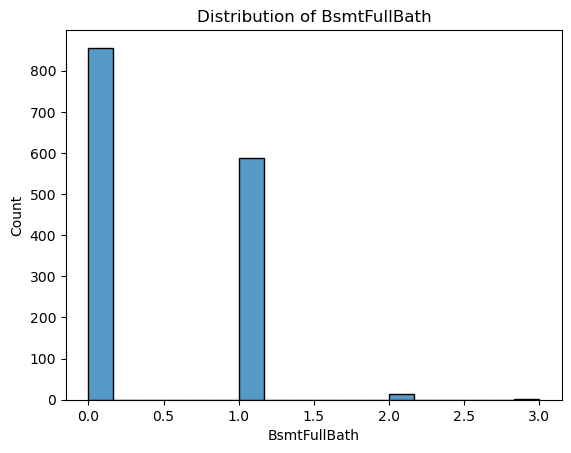

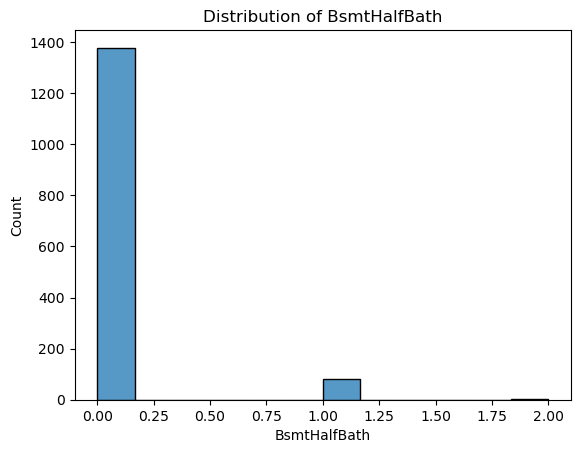

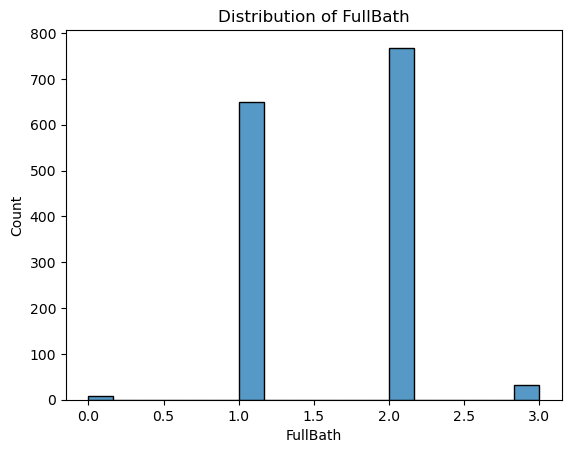

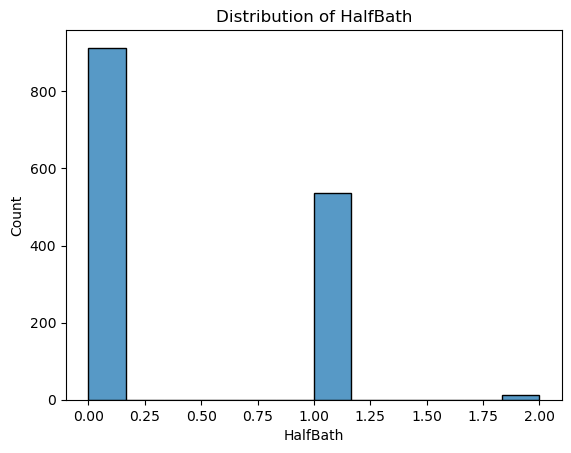

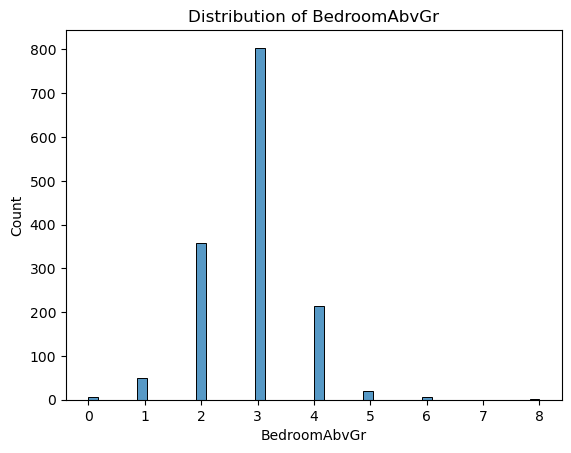

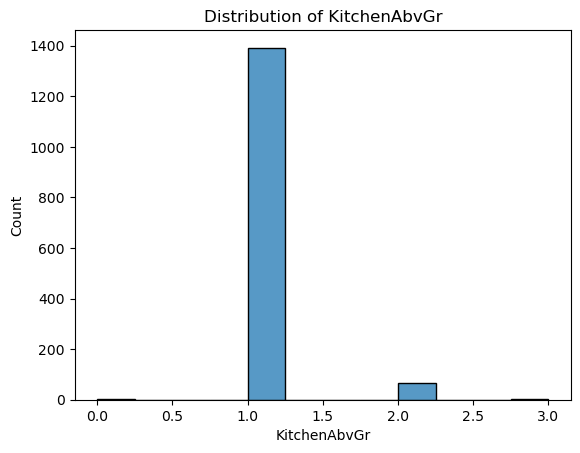

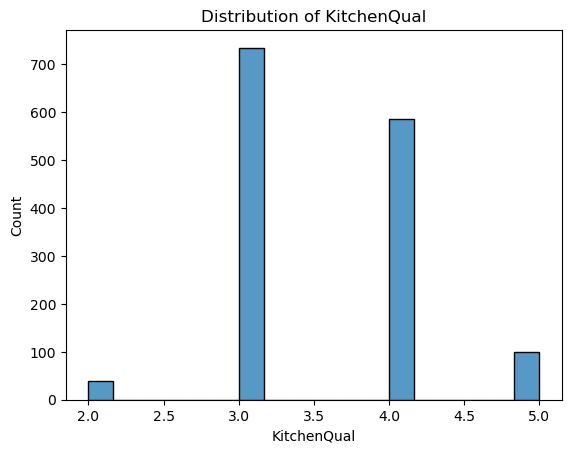

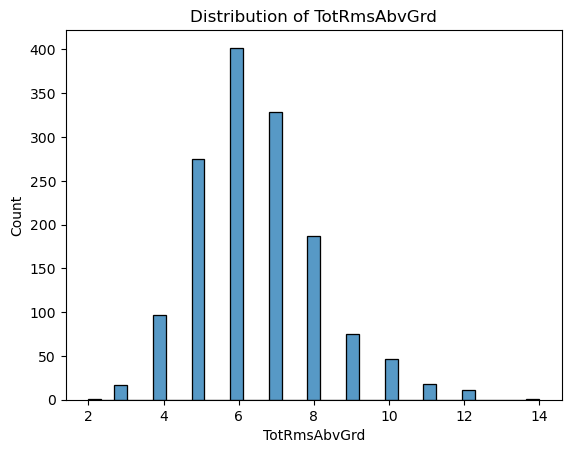

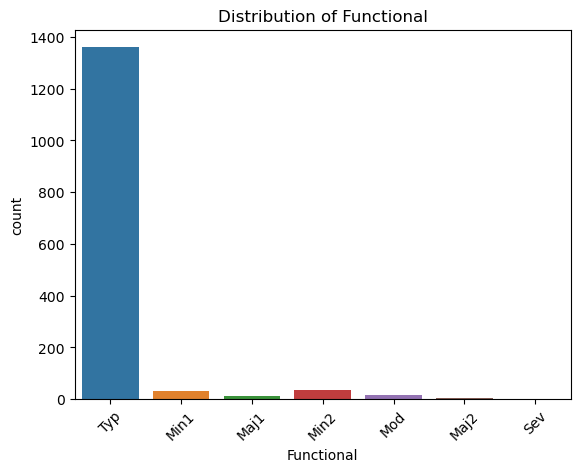

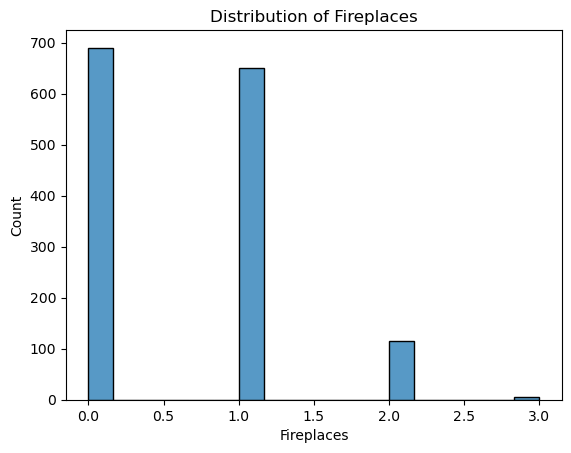

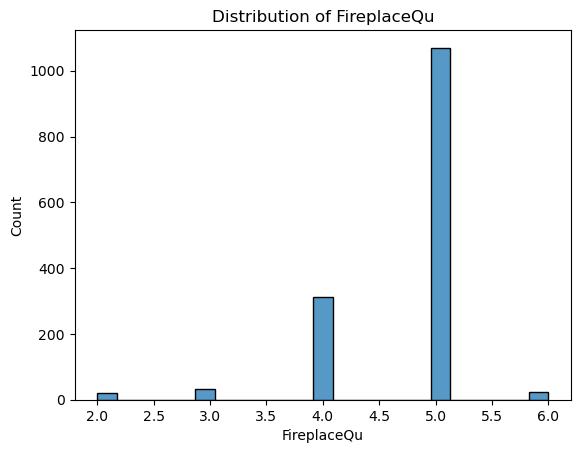

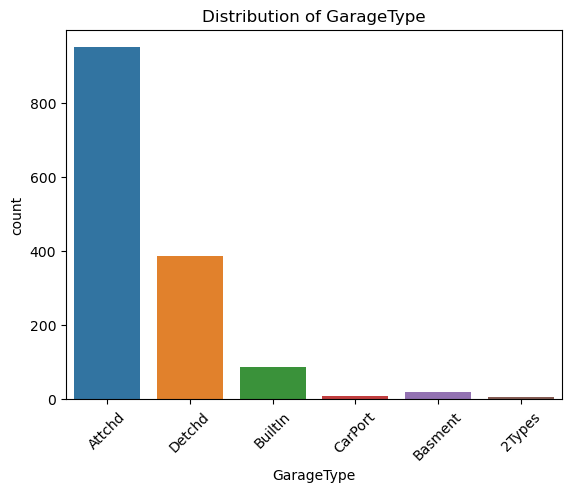

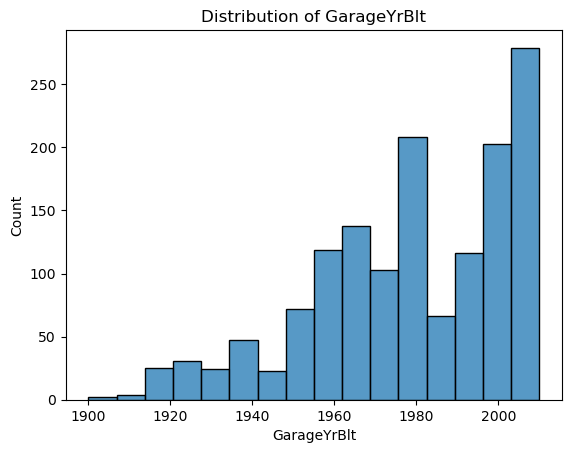

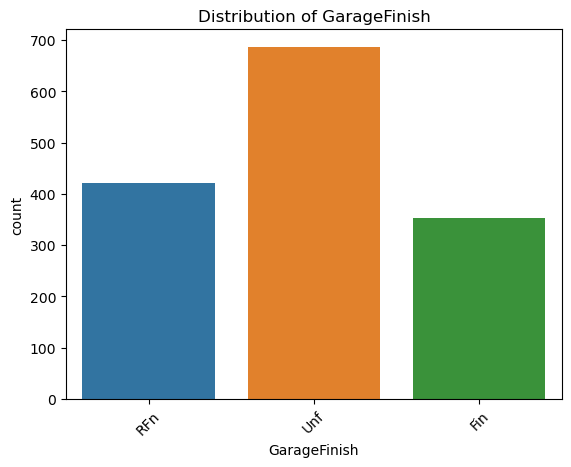

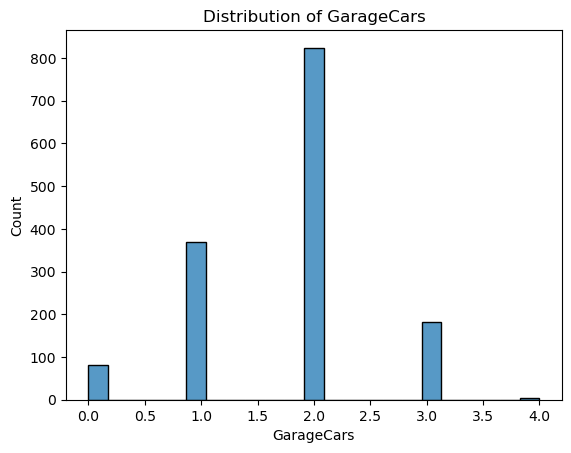

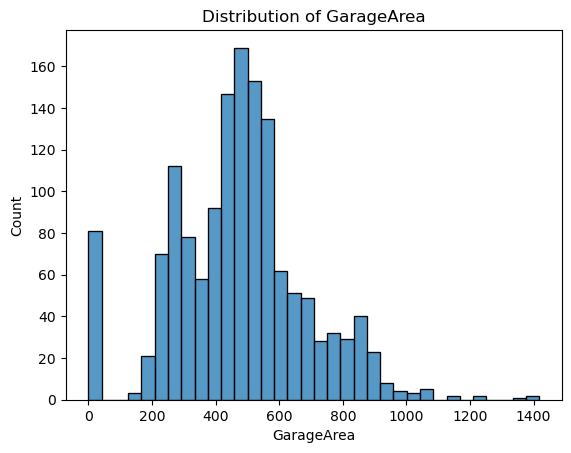

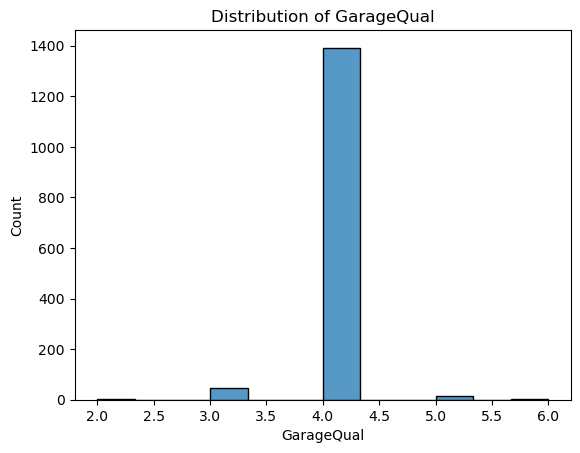

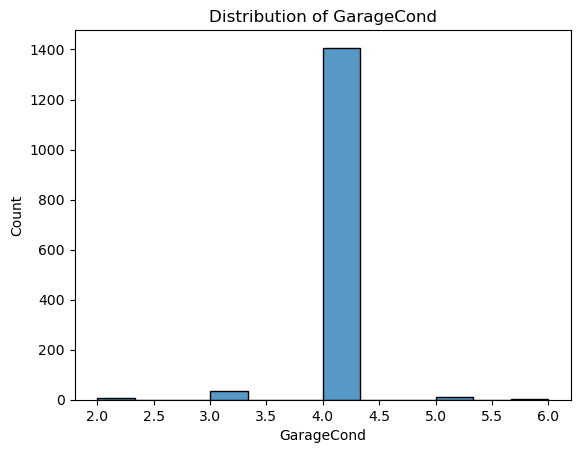

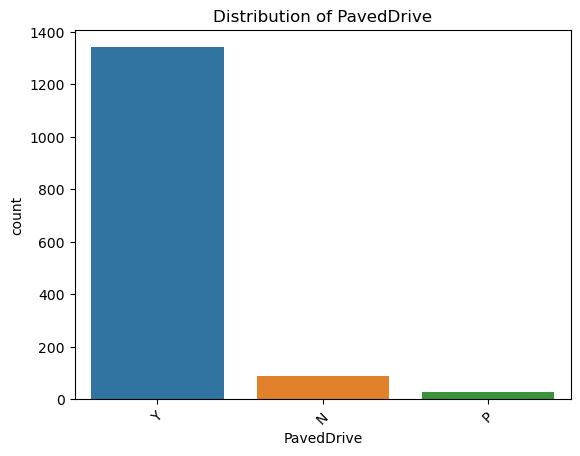

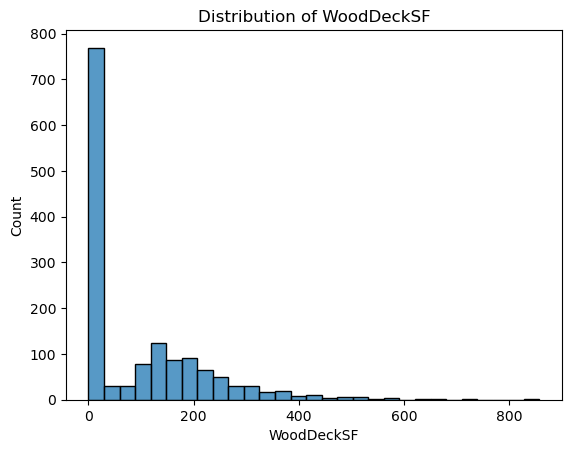

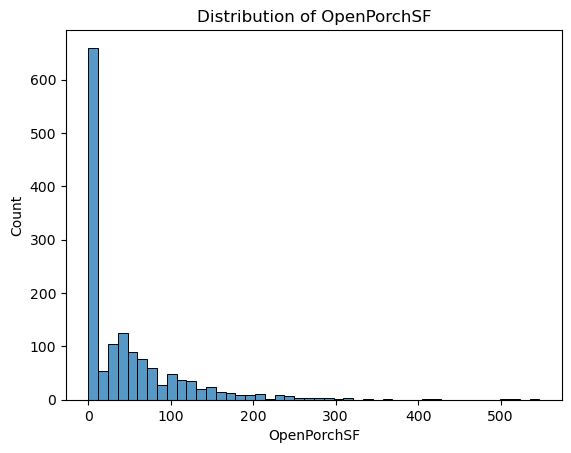

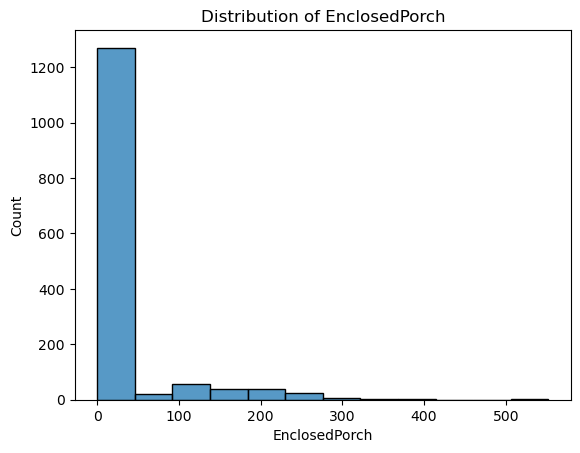

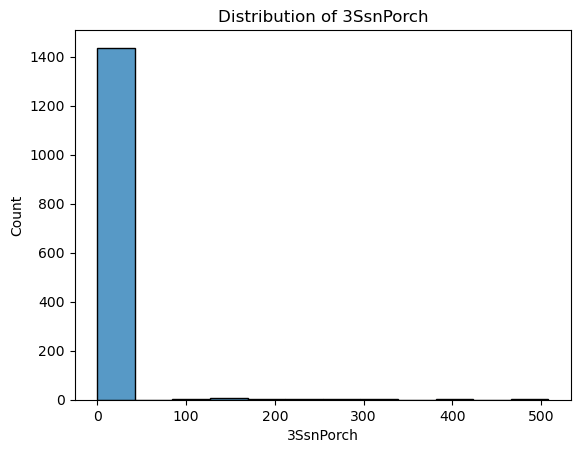

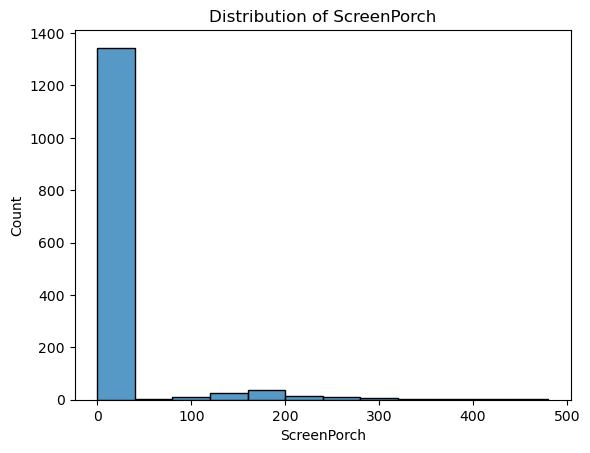

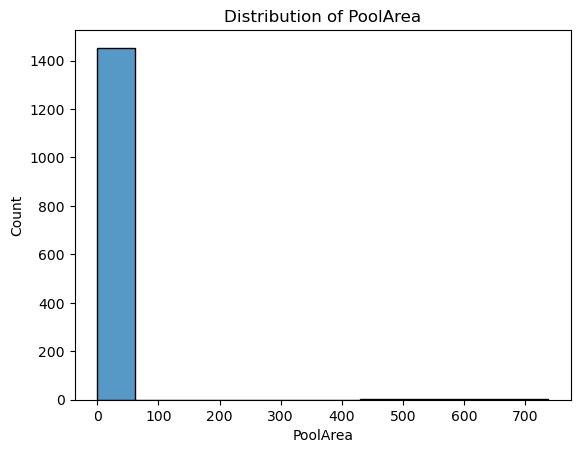

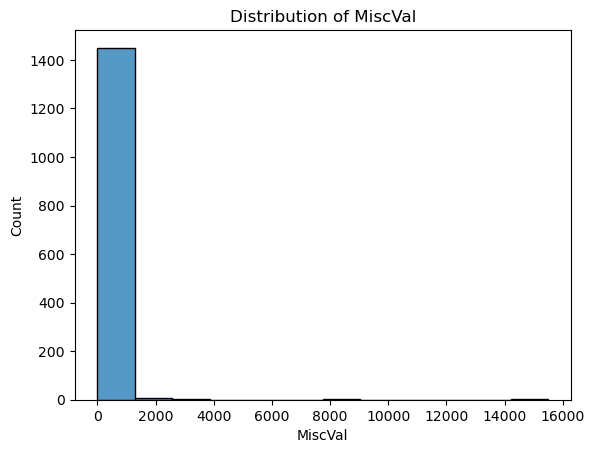

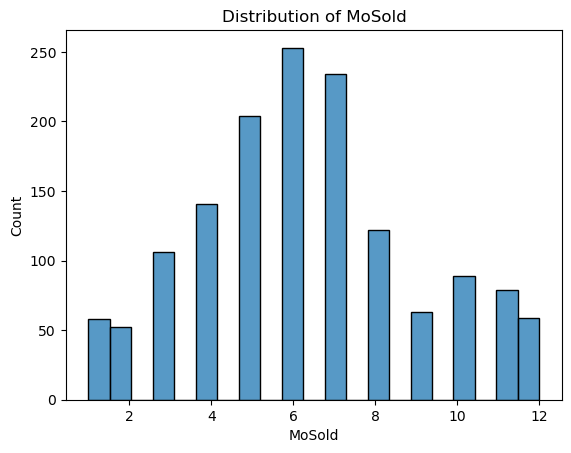

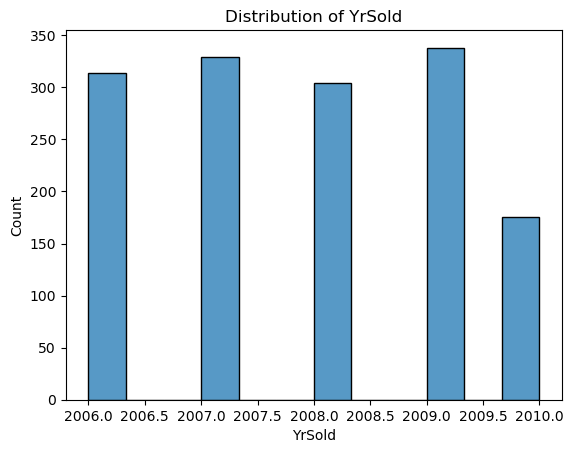

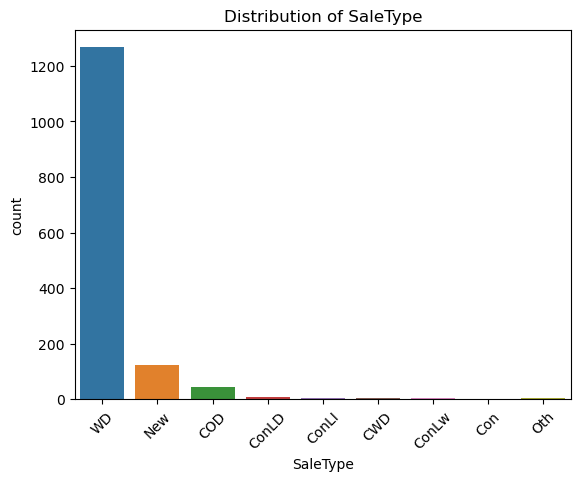

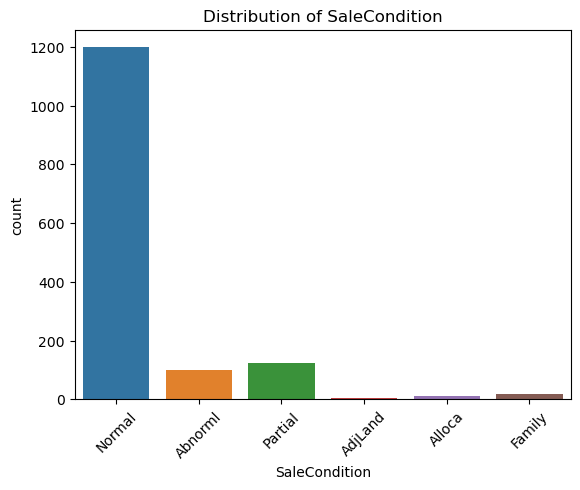

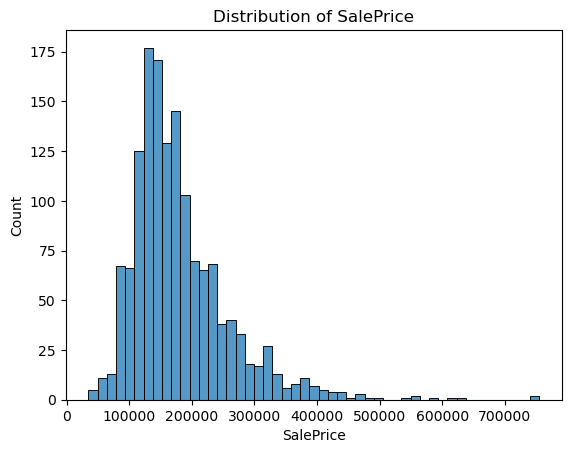

In [14]:
# Univariate EDA
for column in df.columns:
    if df[column].dtype == 'object':  # for categorical variables
        sns.countplot(x=column, data=df)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
        plt.show()
    else:  # for numerical variables
        sns.histplot(df[column])
        plt.title(f'Distribution of {column}')
        plt.show()

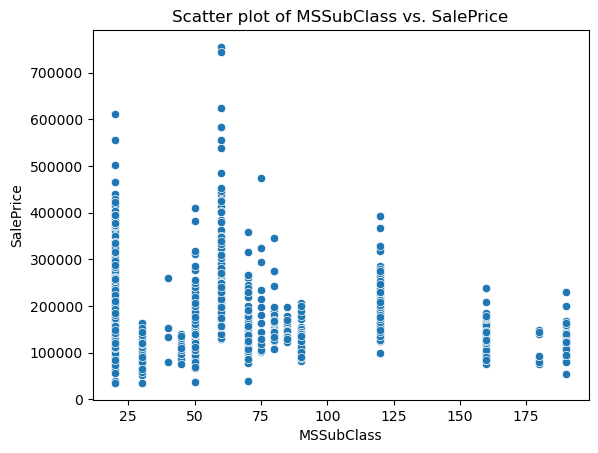

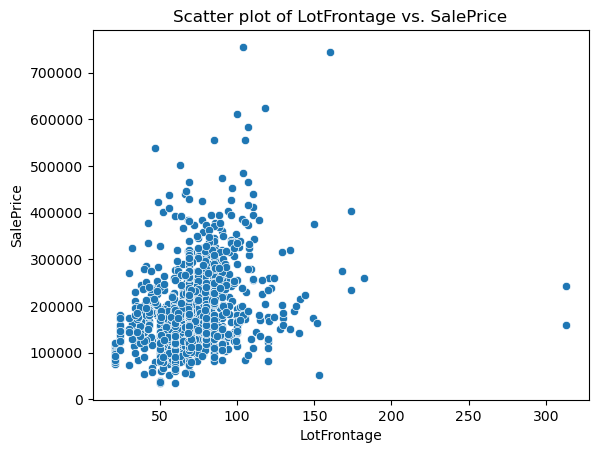

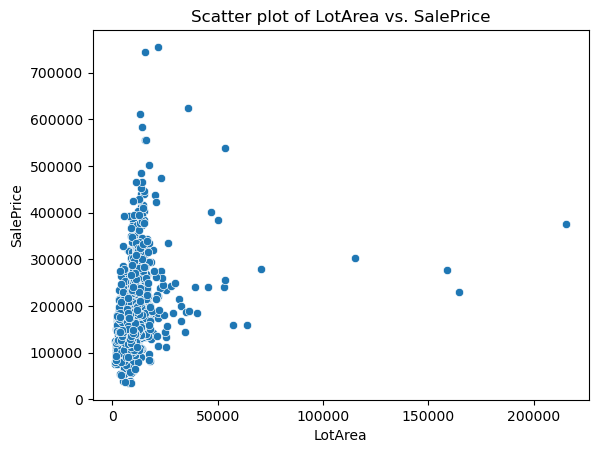

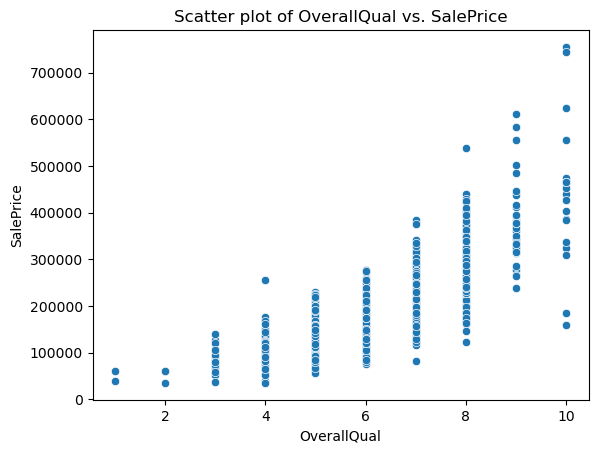

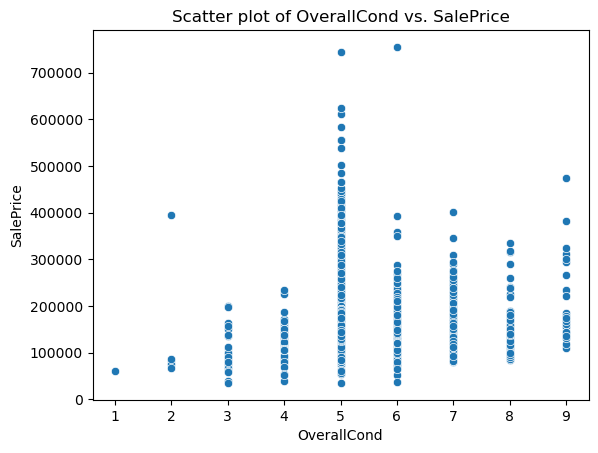

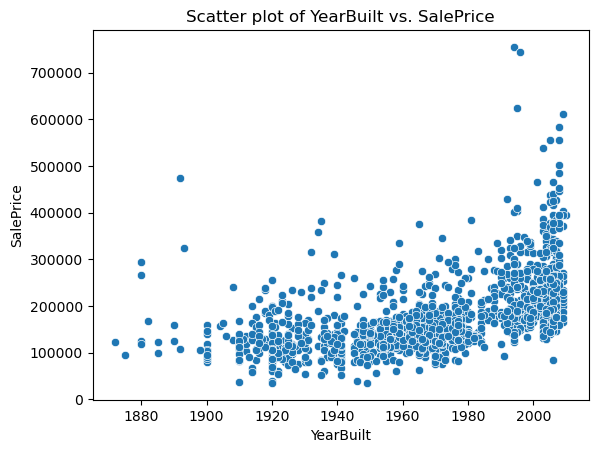

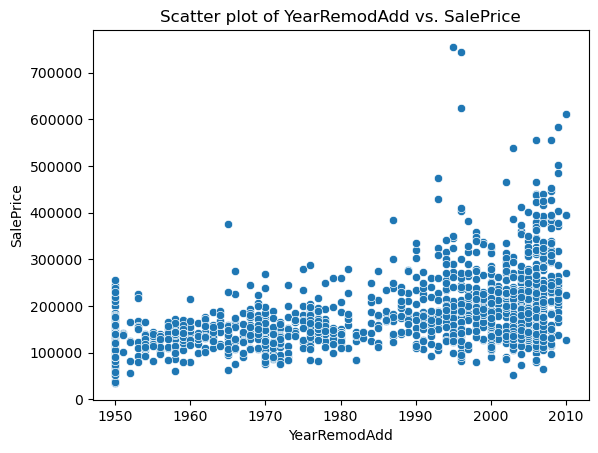

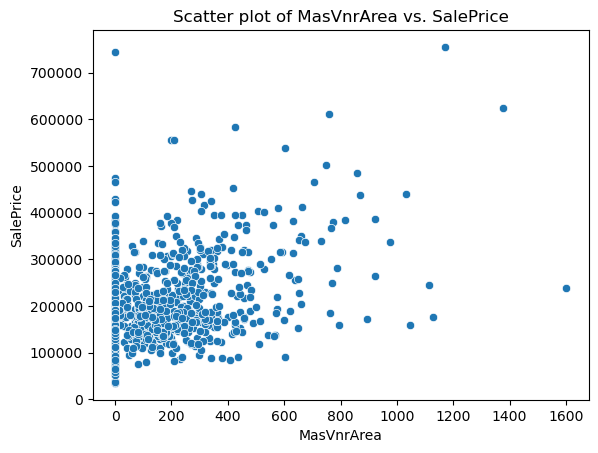

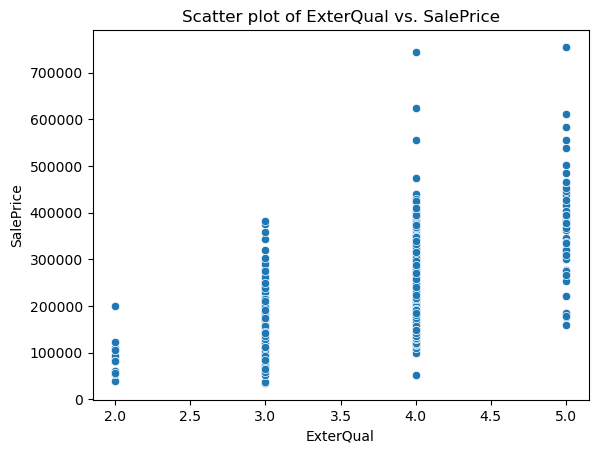

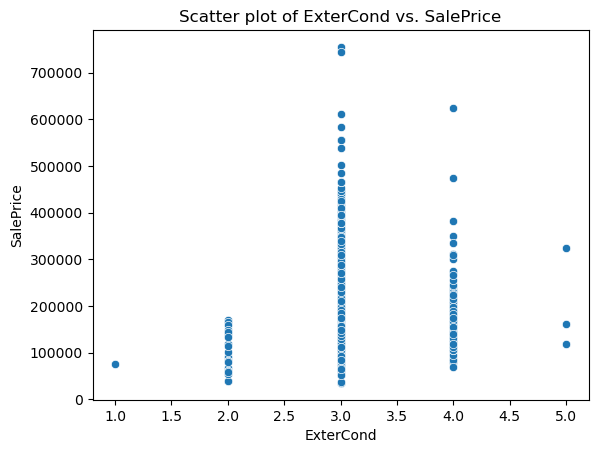

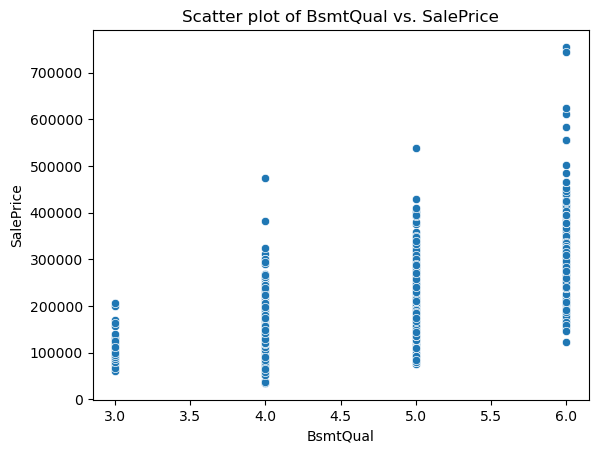

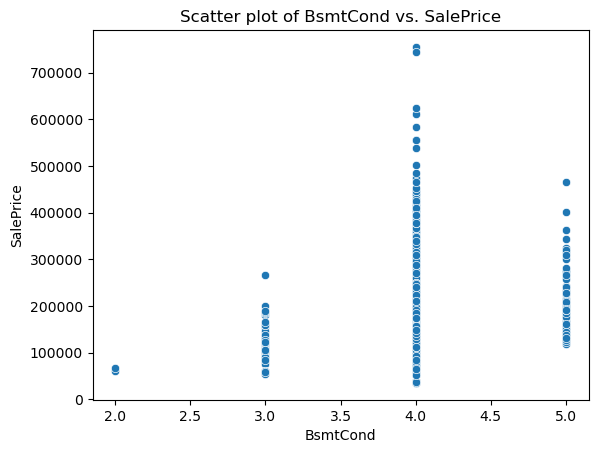

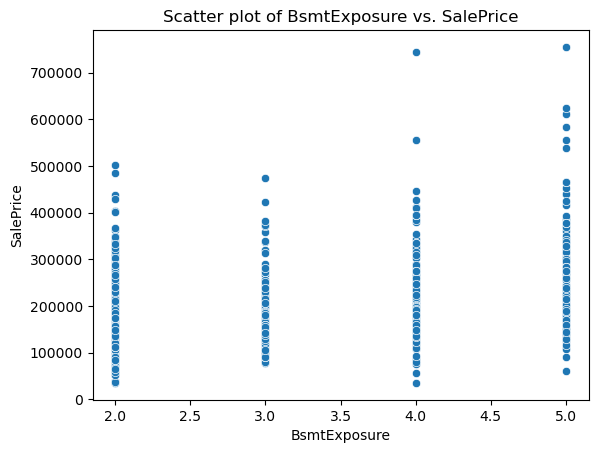

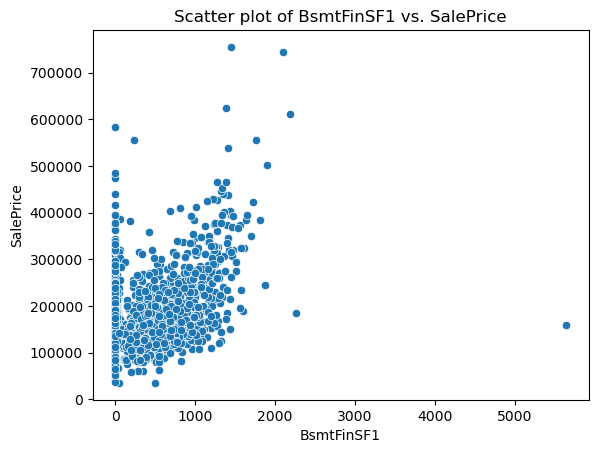

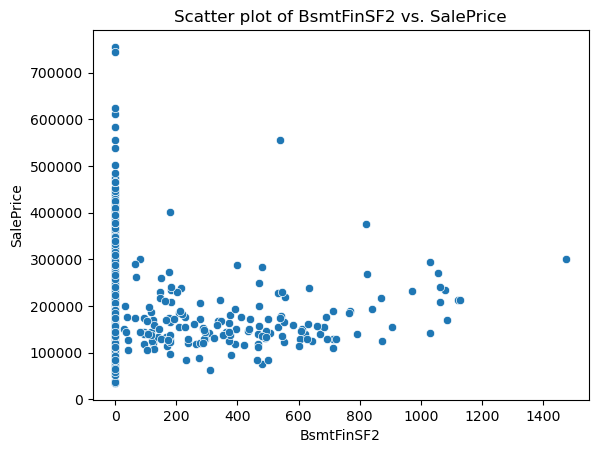

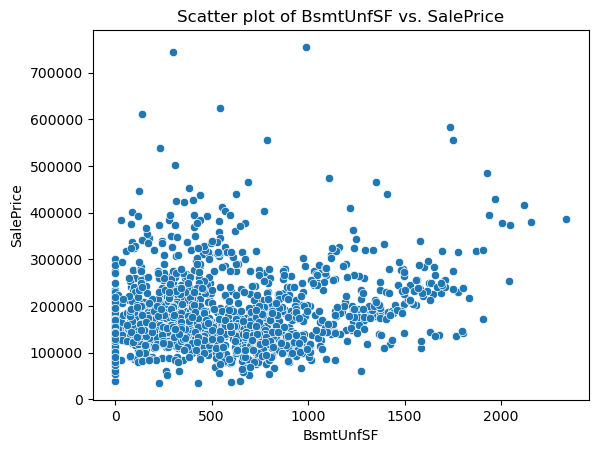

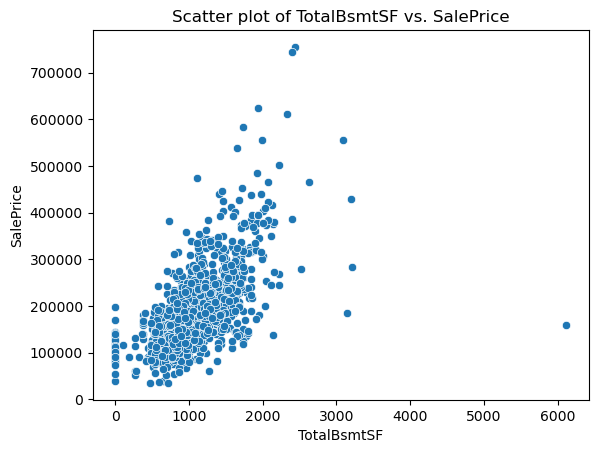

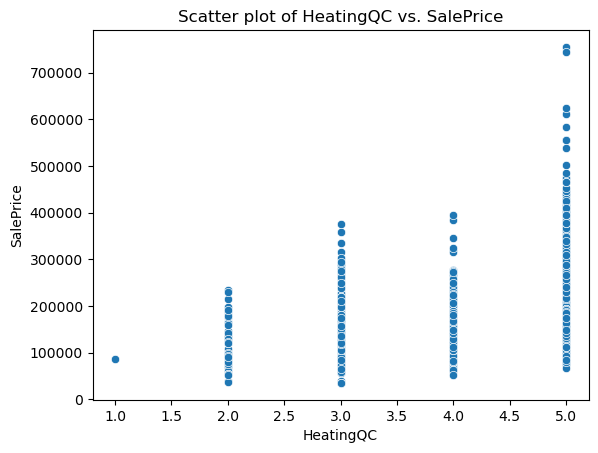

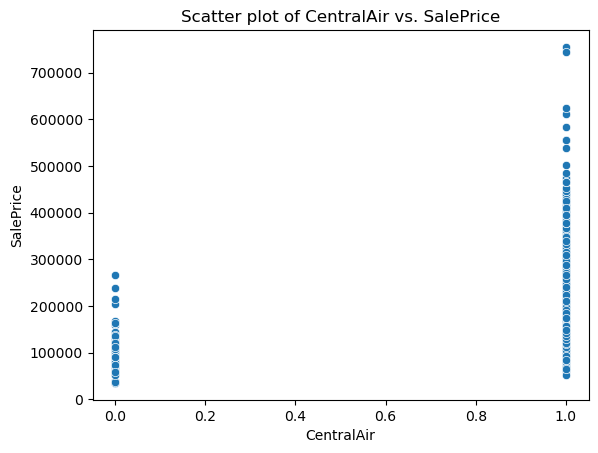

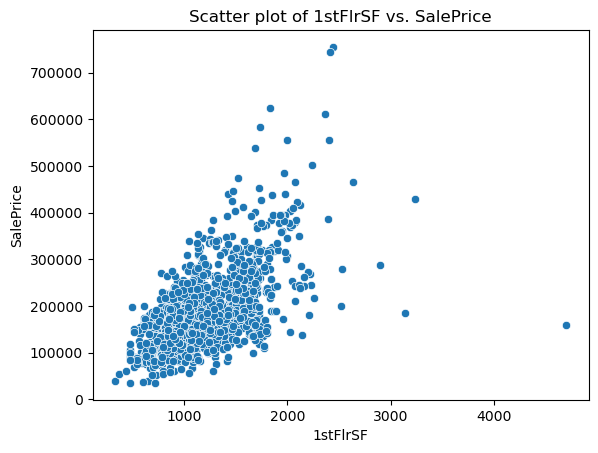

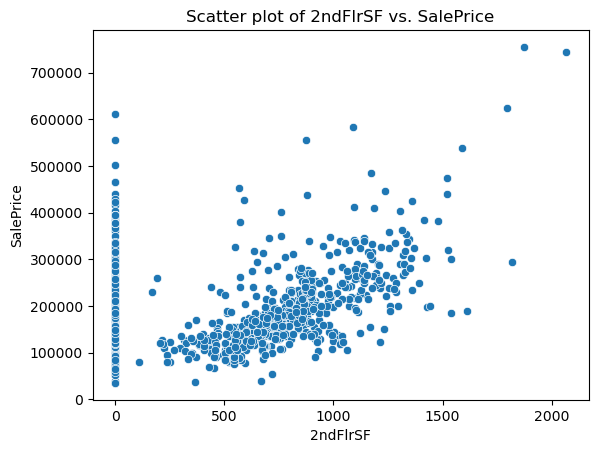

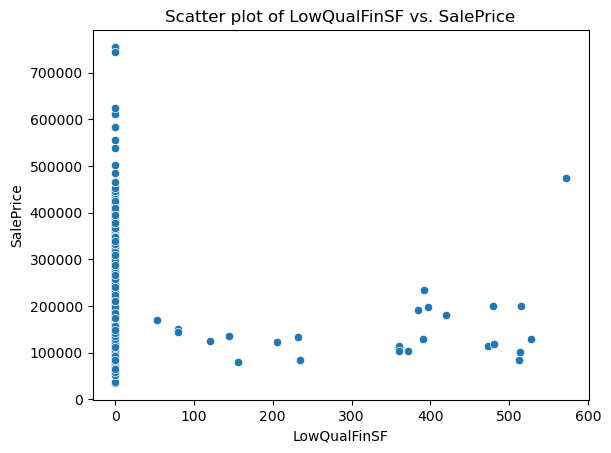

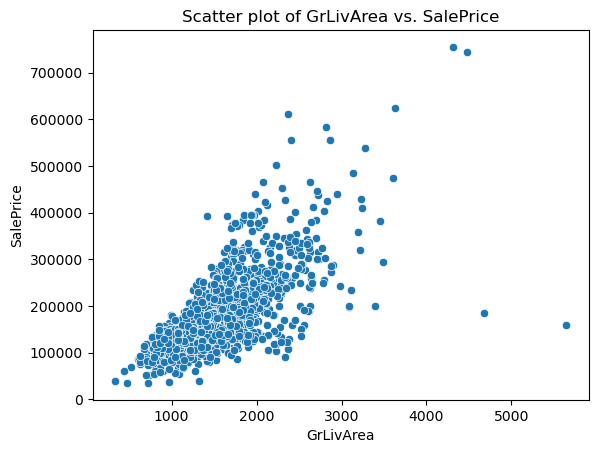

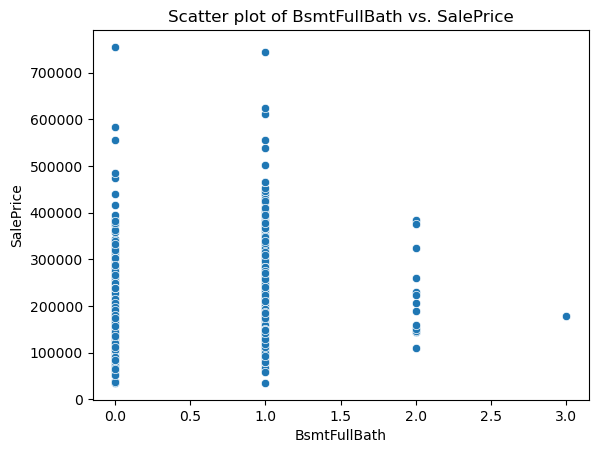

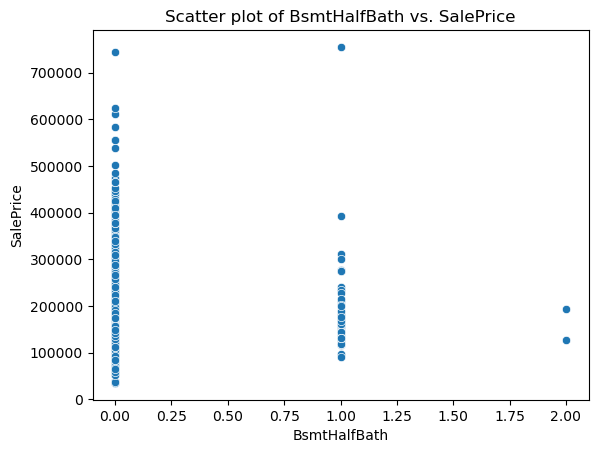

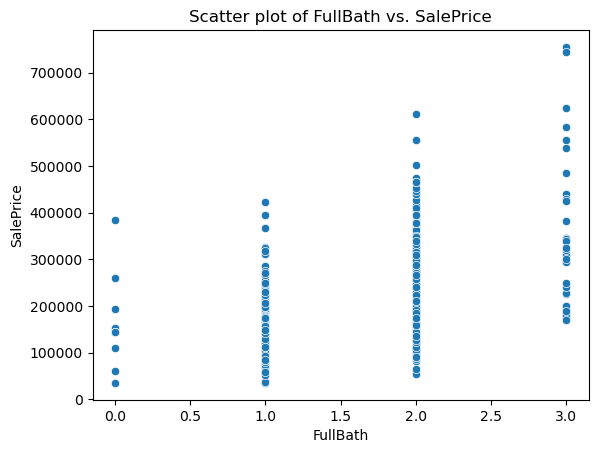

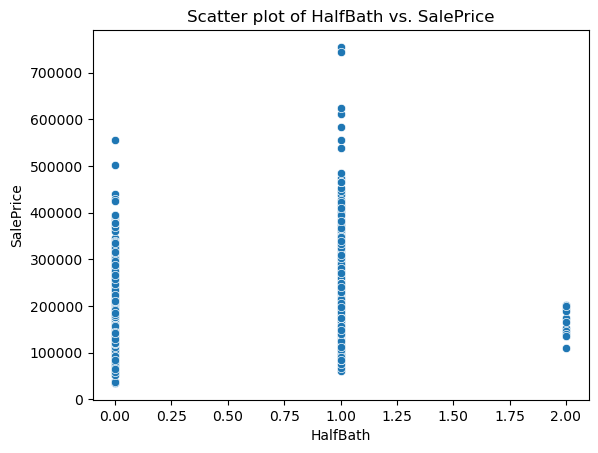

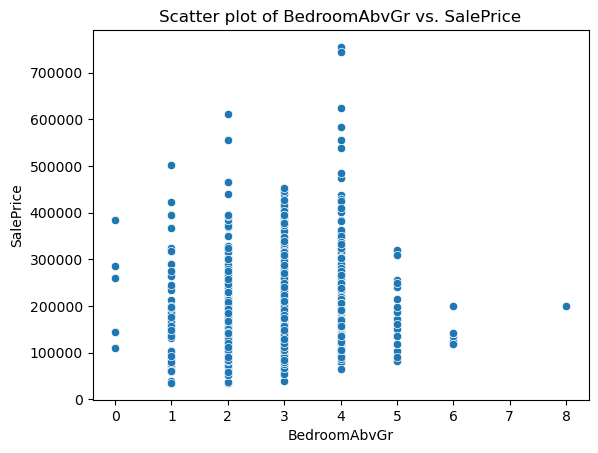

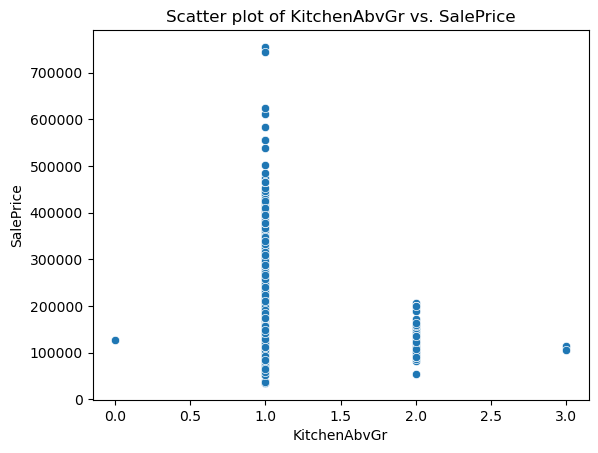

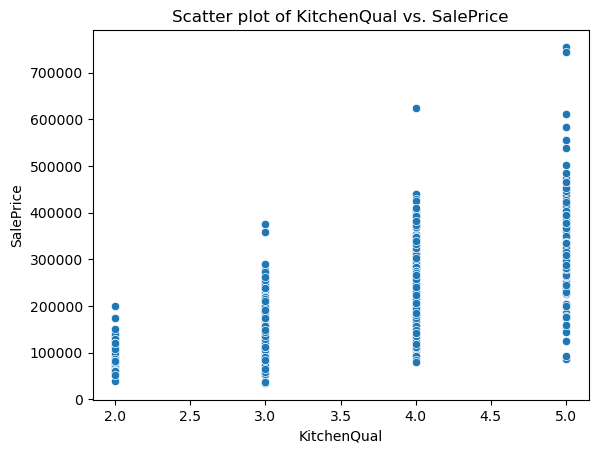

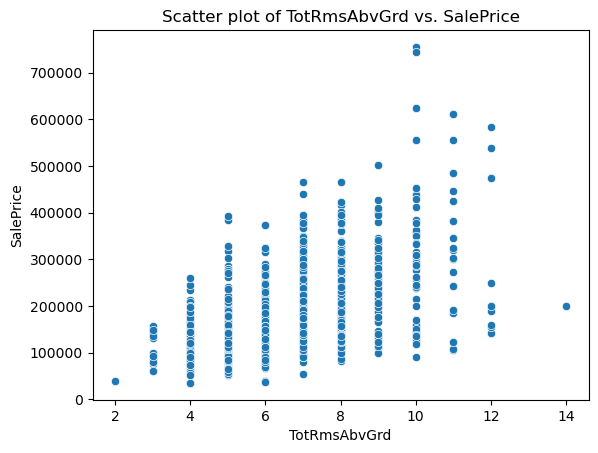

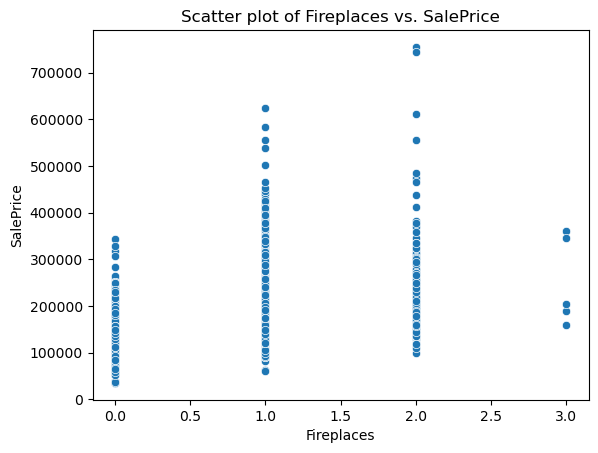

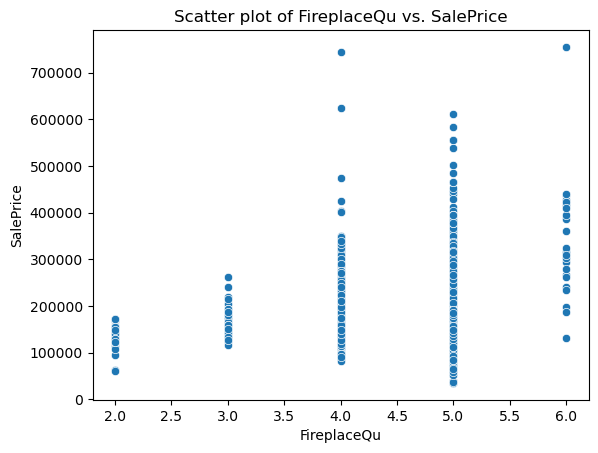

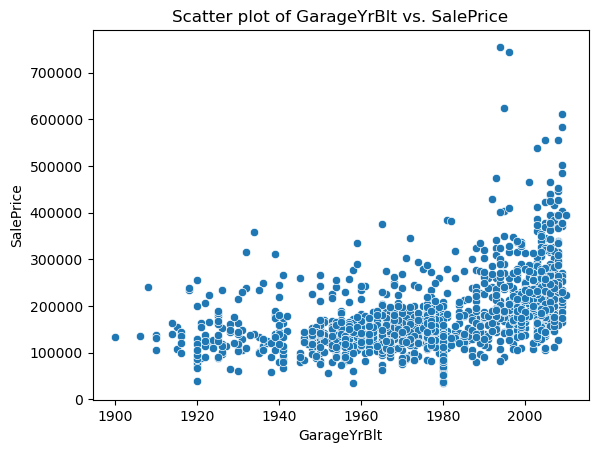

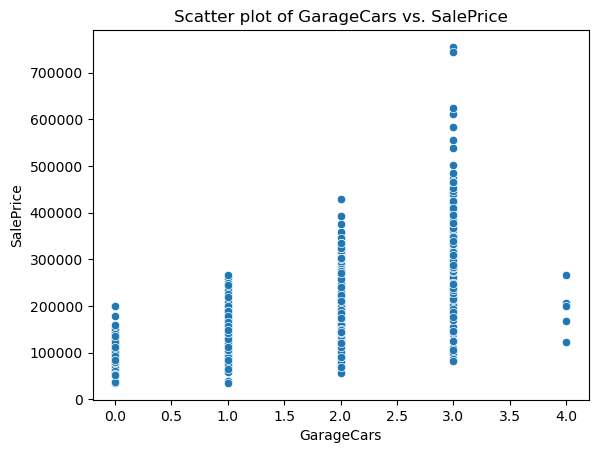

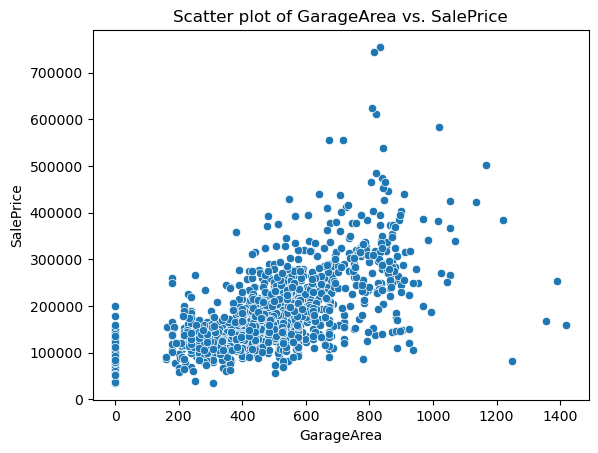

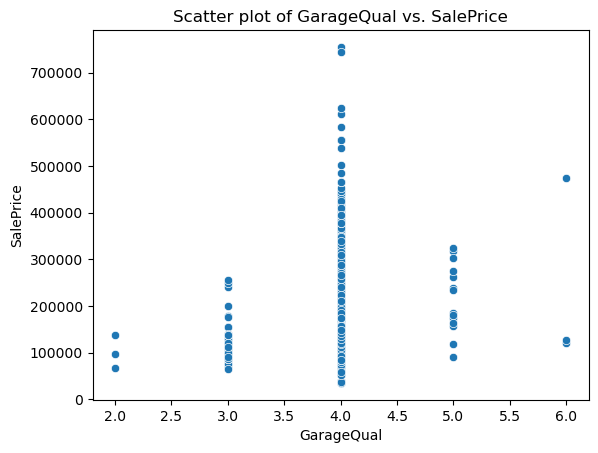

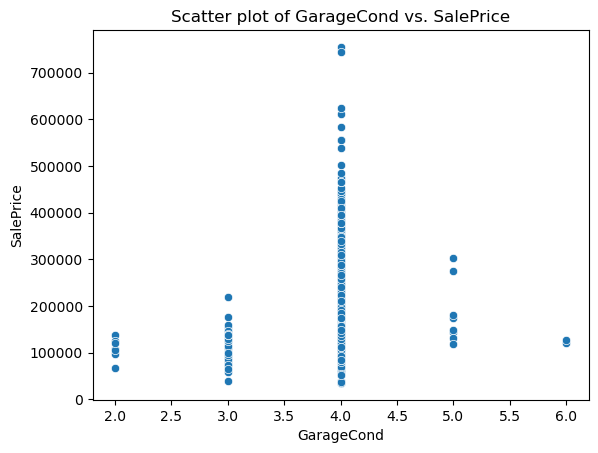

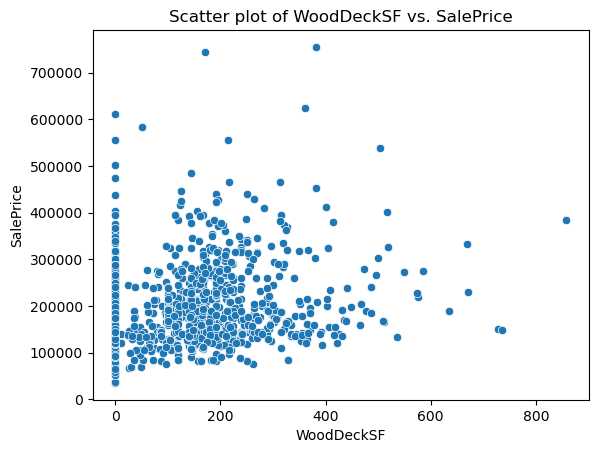

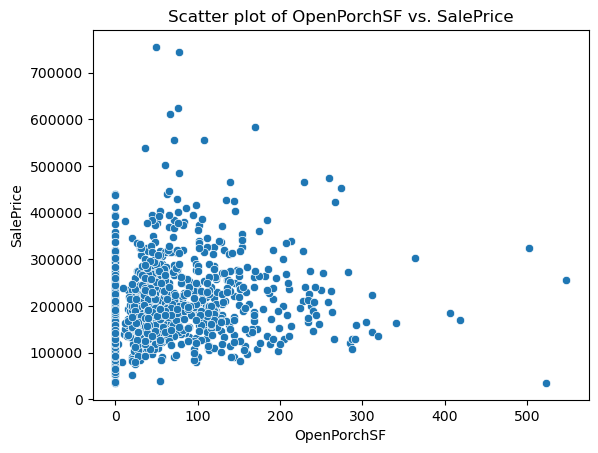

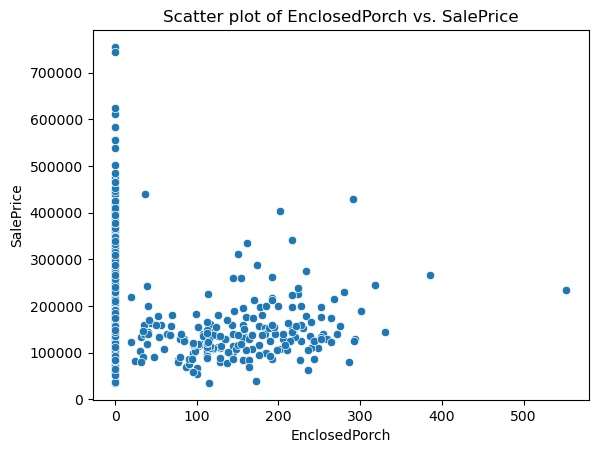

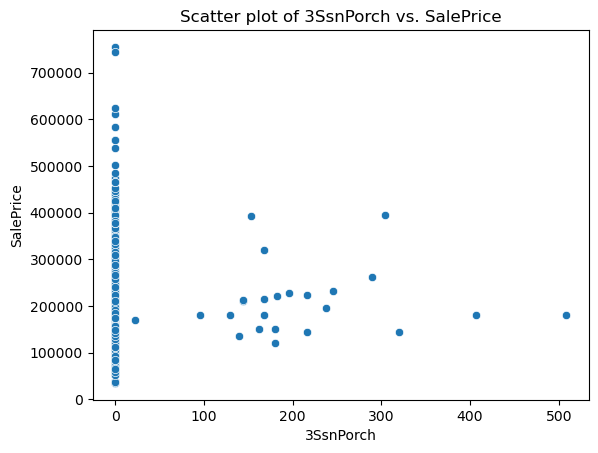

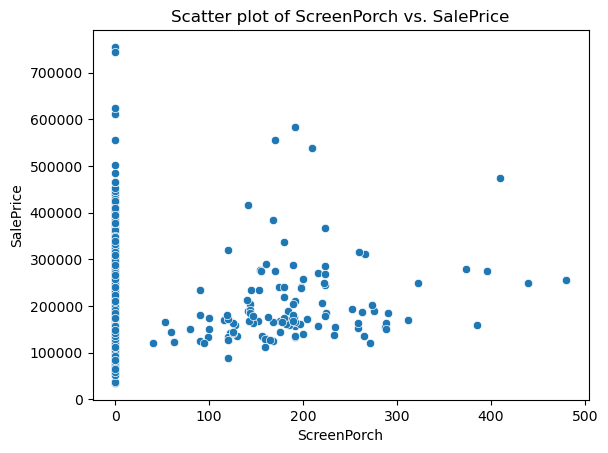

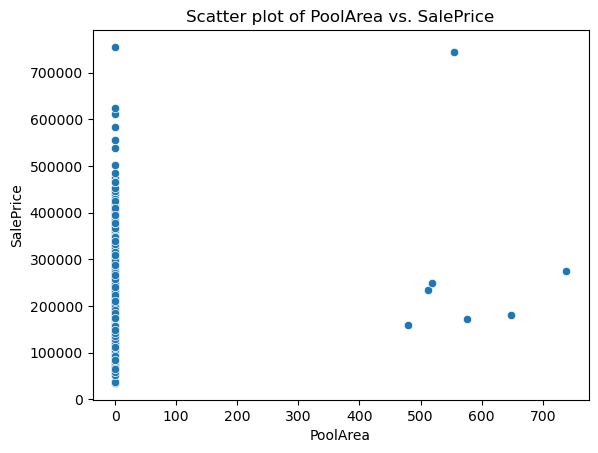

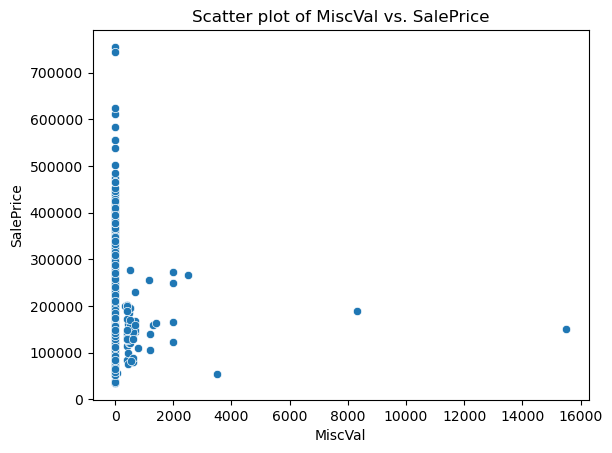

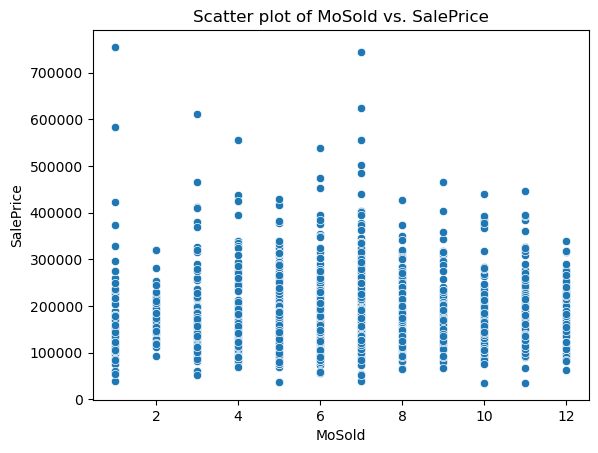

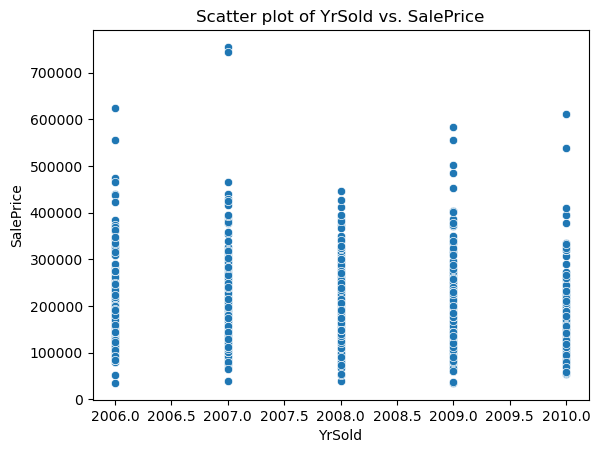

In [35]:
# Get all numeric columns except 'SalePrice'

numeric_columns = df.select_dtypes(include='number').columns.tolist()
numeric_columns.remove('SalePrice')  # remove 'SalePrice' from the list

# Plot scatter plots for each numeric column against 'SalePrice'
for column in numeric_columns:
    sns.scatterplot(x=column, y='SalePrice', data=df)
    plt.title(f'Scatter plot of {column} vs. SalePrice')
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.show()

In [15]:
# Get the dummy variables for the categorical features
df = pd.get_dummies(df,columns=['MSSubClass','MSZoning','Street','LotShape','LandContour'
                                ,'Utilities','LotConfig','LandSlope','Neighborhood','Condition1'
                               ,'Condition2','BldgType','HouseStyle','YearBuilt','YearRemodAdd'
                               ,'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType'
                               ,'Foundation','BsmtFinType1','BsmtFinType2','Heating','HeatingQC'
                               ,'Electrical','Functional','GarageType','GarageYrBlt','GarageFinish'
                               ,'PavedDrive','MoSold','YrSold','SaleType','SaleCondition']
                    , drop_first = True, dtype='int')


In [38]:
df.head(5)

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0         65.0     8450            7            5       196.0          4   
1         80.0     9600            6            8         0.0          3   
2         68.0    11250            7            5       162.0          4   
3         60.0     9550            7            5         0.0          3   
4         84.0    14260            8            5       350.0          4   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
0          3         5         4             2         706           0   
1          3         5         4             5         978           0   
2          3         5         4             3         486           0   
3          3         4         5             2         216           0   
4          3         5         4             4         655           0   

   BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856           1       856       854             0   
1        284         1262           1      1262         0             0   
2        434          920           1       920       866             0   
3        540          756           1       961       756             0   
4        490         1145           1      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
0             1            4             8           0            5   
1             1            3             6           1            4   
2             1            4             6           1            4   
3             1            4             7           1            5   
4             1            4             9           1            4   

   GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0           2         548           4           4           0           61   
1           2         460           4           4         298            0   
2           2         608           4           4           0           42   
3           3         642           4           4           0           35   
4           3         836           4           4         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0              0          0            0         0        0     208500   
1              0          0            0         0        0     181500   
2              0          0            0         0        0     223500   
3            272          0            0         0        0     140000   
4              0          0            0         0        0     250000   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  ...  \
0              0              0              0              0  ...   
1              0              0              0              0  ...   
2              0              0              0              0  ...   
3              1              0              0              0  ...   
4        

In [16]:
#Dropping target dependent column from dataset
X = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

In [17]:
#Performing a train-test split.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
#Performing scling on features
scaler = MinMaxScaler()
#Base model
linear_reg = LinearRegression()

In [64]:
#pipeline creation and fitting
linear_reg_pipeline = make_pipeline(scaler,PolynomialFeatures(degree=2),linear_reg)
linear_reg_pipeline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [65]:
#predictions
y_pred_linear_reg_train = linear_reg_pipeline.predict(X_train)
y_pred_linear_reg_test = linear_reg_pipeline.predict(X_test)

In [66]:
#r2 score
r2_linear_reg_train = r2_score(y_train,y_pred_linear_reg_train)
r2_linear_reg_test = r2_score(y_test,y_pred_linear_reg_test)

In [67]:
print("Training R-squared:")
print(f"Linear Regression: {r2_linear_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Linear Regression: {r2_linear_reg_test:.2f}")

Training R-squared:
Linear Regression: 1.00

Testing R-squared:
Linear Regression: 0.85


In [88]:
#Ridge model
scaler = MinMaxScaler() #MinMaxScaler
ridge_reg = Ridge(alpha=250) #penalty
#pipeline creation and fitting
ridge_reg_pipeline = make_pipeline(scaler,PolynomialFeatures(degree=2),ridge_reg)
ridge_reg_pipeline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=250))])

In [89]:
#predictions
y_pred_ridge_reg_train = ridge_reg_pipeline.predict(X_train)
y_pred_ridge_reg_test = ridge_reg_pipeline.predict(X_test)

In [90]:
#r2 score
r2_ridge_reg_train = r2_score(y_train,y_pred_ridge_reg_train)
r2_ridge_reg_test = r2_score(y_test,y_pred_ridge_reg_test)

In [91]:
print("Training R-squared:")
print(f"RidgeMM Regression: {r2_ridge_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"RidgeMM Regression: {r2_ridge_reg_test:.2f}")

Training R-squared:
RidgeMM Regression: 0.95

Testing R-squared:
RidgeMM Regression: 0.85


In [126]:
#Lasso model
scaler = MinMaxScaler() #MinMaxScaler
lasso_reg = Lasso(alpha=0.035) #penalty
#pipeline creation and fitting
lasso_reg_pipeline = make_pipeline(scaler,PolynomialFeatures(degree=2),lasso_reg)
lasso_reg_pipeline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.035))])

In [127]:
#predictions
y_pred_lasso_reg_train = lasso_reg_pipeline.predict(X_train)
y_pred_lasso_reg_test = lasso_reg_pipeline.predict(X_test)

In [128]:
#r2 score
r2_lasso_reg_train = r2_score(y_train,y_pred_lasso_reg_train)
r2_lasso_reg_test = r2_score(y_test,y_pred_lasso_reg_test)

In [129]:
print("Training R-squared:")
print(f"Lasso Regression: {r2_lasso_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Lasso Regression: {r2_lasso_reg_test:.2f}")

Training R-squared:
Lasso Regression: 1.00

Testing R-squared:
Lasso Regression: 0.85


In [130]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
51       MSSubClass_160  inf
18            GrLivArea  inf
405  GarageYrBlt_1942.0  inf
234   YearRemodAdd_1952  inf
223      YearBuilt_2001  inf
..                  ...  ...
299    RoofMatl_Membran  NaN
363      Electrical_Mix  NaN
390  GarageYrBlt_1927.0  NaN
396  GarageYrBlt_1933.0  NaN
408  GarageYrBlt_1947.0  NaN

[504 rows x 2 columns]

In [19]:
#Dropping two columns with high VIF from train dataset
X_train = X_train.drop(['GarageYrBlt_1942.0','YearRemodAdd_1952'], axis = 1)

In [20]:
#Dropping two columns with high VIF from test dataset
X_test = X_test.drop(['GarageYrBlt_1942.0','YearRemodAdd_1952'], axis = 1)

In [204]:
#Ridge model 2
scaler = MinMaxScaler() #MinMaxScaler
ridge_reg2 = Ridge(alpha=850) #penalty
#pipeline creation and fitting
ridge_reg_pipeline2 = make_pipeline(scaler,PolynomialFeatures(degree=2),ridge_reg2)
ridge_reg_pipeline2.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=850))])

In [205]:
#predictions
y_pred_ridge_reg_train2 = ridge_reg_pipeline2.predict(X_train)
y_pred_ridge_reg_test2 = ridge_reg_pipeline2.predict(X_test)

In [206]:
#r2 score
r2_ridge_reg_train2 = r2_score(y_train,y_pred_ridge_reg_train2)
r2_ridge_reg_test2 = r2_score(y_test,y_pred_ridge_reg_test2)

In [207]:
print("Training R-squared:")
print(f"Ridge Regression 2: {r2_ridge_reg_train2:.2f}")
print("\nTesting R-squared:")
print(f"Ridge Regression 2: {r2_ridge_reg_test2:.2f}")

Training R-squared:
Ridge Regression 2: 0.89

Testing R-squared:
Ridge Regression 2: 0.83


In [208]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
49        MSSubClass_90  inf
16             2ndFlrSF  inf
112     BldgType_Duplex  inf
113      BldgType_Twnhs  inf
114     BldgType_TwnhsE  inf
..                  ...  ...
298    RoofMatl_Membran  NaN
362      Electrical_Mix  NaN
389  GarageYrBlt_1927.0  NaN
395  GarageYrBlt_1933.0  NaN
406  GarageYrBlt_1947.0  NaN

[502 rows x 2 columns]

In [21]:
#Dropping two columns with high VIF from train dataset
X_train = X_train.drop(['MSSubClass_90','BldgType_Duplex'], axis = 1)
#Dropping two columns with high VIF from test dataset
X_test = X_test.drop(['MSSubClass_90','BldgType_Duplex'], axis = 1)

In [70]:
#Ridge model 3
scaler = MinMaxScaler() #MinMaxScaler
ridge_reg3 = Ridge(alpha=1400) #penalty
#pipeline creation and fitting
ridge_reg_pipeline3 = make_pipeline(scaler,PolynomialFeatures(degree=2),ridge_reg3)
ridge_reg_pipeline3.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1400))])

In [71]:
#predictions
y_pred_ridge_reg_train3 = ridge_reg_pipeline3.predict(X_train)
y_pred_ridge_reg_test3 = ridge_reg_pipeline3.predict(X_test)

In [72]:
#r2 score
r2_ridge_reg_train3 = r2_score(y_train,y_pred_ridge_reg_train3)
r2_ridge_reg_test3 = r2_score(y_test,y_pred_ridge_reg_test3)

In [73]:
print("Training R-squared:")
print(f"Ridge Regression 3: {r2_ridge_reg_train3:.2f}")
print("\nTesting R-squared:")
print(f"Ridge Regression 3: {r2_ridge_reg_test3:.2f}")

Training R-squared:
Ridge Regression 3: 0.86

Testing R-squared:
Ridge Regression 3: 0.81


In [243]:
from sklearn.model_selection import cross_val_score 
cv_scores_ridge = cross_val_score(ridge_reg_pipeline3, X_train, y_train, cv=5, scoring='r2') 
cv_scores_ridge,np.std(cv_scores_ridge) 

(array([0.77736621, 0.82457543, 0.7376479 , 0.8056465 , 0.82518487]),
 0.033151775791691075)

#### Base Model : Train: 100% Test: 85% --Overfitting
#### Ridge Model: Train: 95% Test: 85%  --High variance
#### Lasso Model: Train: 100% Test: 85% --Overfitting
#### Ridge Model 2: Train: 89% Test: 83% --High accuracy, Moderate variance 
#### Ridge Model 3: Train: 86% Test: 81% --Best choice, High accuracy, 5% variance, good CV score
#### Hence, we select Ridge Model 3 for predictions

Text(0.5, 0, 'Errors')

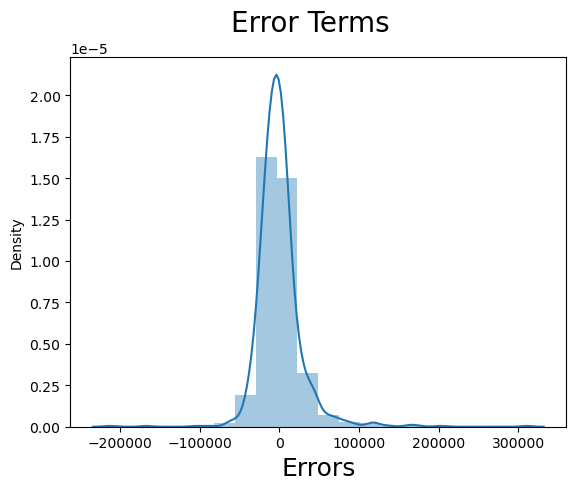

In [244]:
#Residual Analysis of the train data to ensure model is robust
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_ridge_reg_train3), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### Error terms are normally distributed

Text(0, 0.5, 'y_pred')

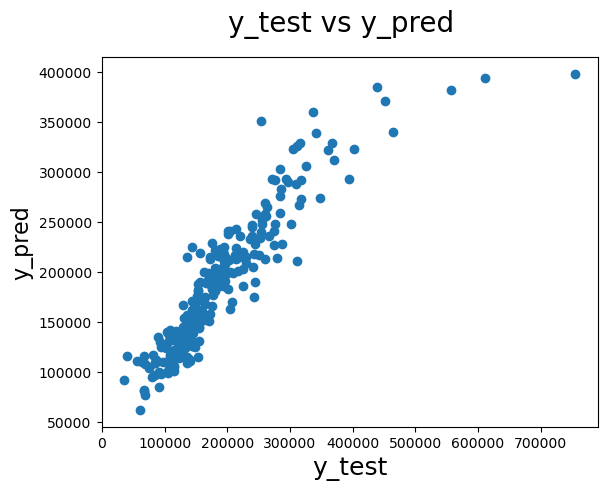

In [245]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_ridge_reg_test3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [27]:
print(ridge_reg_pipeline3.named_steps)

{'minmaxscaler': MinMaxScaler(), 'polynomialfeatures': PolynomialFeatures(), 'ridge': Ridge(alpha=1400)}


In [28]:
print(ridge_reg_pipeline3.named_steps['ridge'].coef_)

[  0.         168.93251641 223.82447081 ... -97.86366016   0.
 228.81430817]


In [38]:
# Get the polynomial feature names
poly_feature_names = ridge_reg_pipeline3[:-1].get_feature_names_out()

In [39]:
# Get coefficients of the Ridge regression model
coefficients = ridge_reg_pipeline3.named_steps['ridge'].coef_

In [40]:
# Map coefficients to corresponding feature names
feature_coefficients = dict(zip(poly_feature_names, coefficients))

In [52]:
# Sort the feature_coefficients dictionary by values in descending order
sorted_feature_coefficients_desc = dict(sorted(feature_coefficients.items(), key=lambda item: item[1], reverse=True))

# Get the top 10 feature-coefficients
top_20_items = dict(list(sorted_feature_coefficients_desc.items())[:10])

# Print the top 10 items
for key, value in top_10_items.items():
    print(f"{key}: {value}")

OverallQual^2: 1349.8043884174012
OverallQual KitchenQual: 1226.430320774589
KitchenQual^2: 1191.796510571332
OverallQual BsmtQual: 1172.5236086239138
BsmtQual KitchenQual: 1111.5150532689693
BsmtQual^2: 1109.4685561825527
OverallQual GarageCars: 1109.36958688283
OverallQual CentralAir: 1089.5395128559207
OverallQual Condition2_Norm: 1057.2377708990632
OverallQual FullBath: 1049.6487840147017
